# Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms
## 1.1. Učitavanje i opis podataka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns', None)
names = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
         'concavity_mean', 'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
         'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave.points_se',
         'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
         'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave.points_worst', 'symmetry_worst', 
         'fractal_dimension_worst']

df = pd.read_csv('wdbc.data', header=None, index_col=0, names=names)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave.points_mean  symmetry_mean  fractal_dimension_mean  \
842302                0.14710         0.2419                 0.07871   
842517                0.07017         0.1812                 0.05667   
84300903              0.12790         0.2069                 0.05999   
84348301              0.10520         0.2597                 0.09744   
84358402              0.10430         0.1809                 0.05883   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
842302       1.0950      0.9053         8.589   153.40       0.006399   
842517       0.5435      0.7339         3.398    74.08       0.005225   
84300903     0.7456      0.7869         4.585    94.03       0.006150   
84348301     0.4956      1.1560         3.445    27.23       0.009110   
84358402     0.7572      0.7813         5.438    94.44       0.011490   

          compactness_se  concavity_se  concave.points_se  symmetry_se  \
842302           0.04904       0.05373            0.01587      0.03003   
842517           0.01308       0.01860            0.01340      0.01389   
84300903         0.04006       0.03832            0.02058      0.02250   
84348301         0.07458       0.05661            0.01867      0.05963   
84358402         0.02461       0.05688            0.01885      0.01756   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
842302                0.006193         25.38          17.33           184.60   
842517                0.003532         24.99          23.41           158.80   
84300903              0.004571         23.57          25.53           152.50   
84348301              0.009208         14.91          26.50            98.87   
84358402              0.005115         22.54          16.67           152.20   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
842302        2019.0            0.1622             0.6656           0.7119   
842517        1956.0            0.1238             0.1866           0.2416   
84300903      1709.0            0.1444             0.4245           0.4504   
84348301       567.7            0.2098             0.8663           0.6869   
84358402      1575.0            0.1374             0.2050           0.4000   

          concave.points_worst  symmetry_worst  fractal_dimension_worst  
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678

Pojašnjenja značajki:
 - diagnosis &ndash; ciljani razred - (B - dobroćudan rak, M - zloćudan rak)
 - radius &ndash; prosjek udaljenosti od središta do točaka opsega
 - texture &ndash; standardna devijacija 'gray-scale' vrijednosti
 - perimeter
 - area
 - smoothness &ndash; lokalna varijacija u duljinama polumjera(radijusa)
 - compactness &ndash; $perimeter^2 / area - 1.0$
 - concavity &ndash; jačina konkavnih dijelova konture
 - concave points &ndash; broj konkavnih dijelova konture
 - symmetry
 - fractal dimension &ndash; 'coastline' aproksimacija

Svaka od značajki osim dijagnoze (eng. diagnosis) dobivena je izračunima provedenim nad uzorcima tkiva metodom FNA (eng. Fine Needle Aspiration). Značajke predstavljaju oblik i veličinu jezgri ciljanih kancerogenih stanica.
Za svaku od tih značajki izračunate su aritmetičke sredine (eng. mean), standardna pogreška (eng. standard error - se) i najgora (eng. worst), tj. najveća vrijednost. Najgora vrijednost izračunata je kao aritmetička sredina tri najveće vrijednosti. 

## 1.2. Pregled podataka i deskriptivna statistika

In [3]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave.points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave.points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

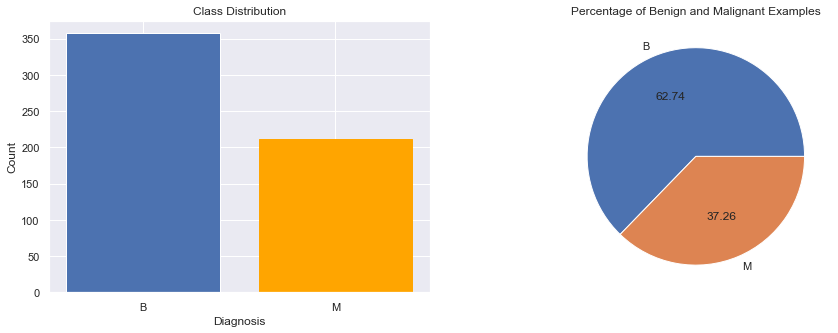

In [4]:
count_per_diagnosis = df.groupby('diagnosis').count().loc[:, 'radius_mean'].values
diagnosis_name = df.groupby('diagnosis').count().index.values

sns.set(rc={'figure.figsize':(30,20)})
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
bar = plt.bar(diagnosis_name, count_per_diagnosis)
bar[1].set_color('orange')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(count_per_diagnosis, labels=diagnosis_name, autopct='%.2f')
plt.title('Percentage of Benign and Malignant Examples')
plt.show()

In [5]:
print('Skup podataka sastoji se od {0} primjera s {1} značajkom od čega je {2} primjera zloćudnog, a {3} dobroćudnog tipa.\n'
      .format(df.shape[0], df.shape[1], len(df[df.diagnosis=='M']), len(df[df.diagnosis=='B'])))
df.info()

Skup podataka sastoji se od 569 primjera s 31 značajkom od čega je 212 primjera zloćudnog, a 357 dobroćudnog tipa.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave.points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se 

Informacije o skupu podataka govore nam da ne postoje nedostajuće vrijednosti s obzirom na to da za svaku značajku postoji 569 'non-null' vrijednosti, a to je ujedno i ukupan broj primjera. Također primjećujemo da su sve vrijednosti numeričke, osim onih u ciljanom razredu. Za algoritme strojnog učenja potrebne su nam samo numeričke vrijednosti pa ćemo preoblikovati podatke tako da ćemo primjerima s oznakom 'M' dodijeliti vrijednost 1, a onima s oznakom 'B' vrijednost 0.

In [6]:
le = LabelEncoder()
le.fit(df.loc[:,'diagnosis'])

df.loc[:,'diagnosis'] = le.transform(df.loc[:,'diagnosis'])
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave.points_mean  symmetry_mean  fractal_dimension_mean  \
842302                0.14710         0.2419                 0.07871   
842517                0.07017         0.1812                 0.05667   
84300903              0.12790         0.2069                 0.05999   
84348301              0.10520         0.2597                 0.09744   
84358402              0.10430         0.1809                 0.05883   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
842302       1.0950      0.9053         8.589   153.40       0.006399   
842517       0.5435      0.7339         3.398    74.08       0.005225   
84300903     0.7456      0.7869         4.585    94.03       0.006150   
84348301     0.4956      1.1560         3.445    27.23       0.009110   
84358402     0.7572      0.7813         5.438    94.44       0.011490   

          compactness_se  concavity_se  concave.points_se  symmetry_se  \
842302           0.04904       0.05373            0.01587      0.03003   
842517           0.01308       0.01860            0.01340      0.01389   
84300903         0.04006       0.03832            0.02058      0.02250   
84348301         0.07458       0.05661            0.01867      0.05963   
84358402         0.02461       0.05688            0.01885      0.01756   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
842302                0.006193         25.38          17.33           184.60   
842517                0.003532         24.99          23.41           158.80   
84300903              0.004571         23.57          25.53           152.50   
84348301              0.009208         14.91          26.50            98.87   
84358402              0.005115         22.54          16.67           152.20   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
842302        2019.0            0.1622             0.6656           0.7119   
842517        1956.0            0.1238             0.1866           0.2416   
84300903      1709.0            0.1444             0.4245           0.4504   
84348301       567.7            0.2098             0.8663           0.6869   
84358402      1575.0            0.1374             0.2050           0.4000   

          concave.points_worst  symmetry_worst  fractal_dimension_worst  
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678

In [7]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave.points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave.points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.72

Kandidati za stršeće podatke su area_mean, perimeter_se, area_se, concavity_se, area_worst i concavity_worst zbog velikog odudaranja maksimalnih vrijednosti od prosječnih, ali ćemo to bolje utvrditi vizualizacijom.

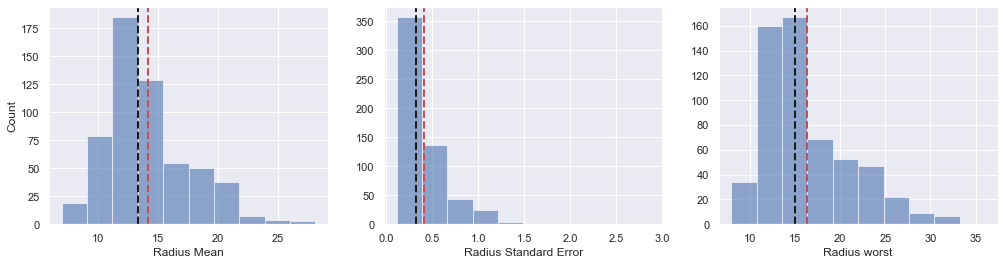

In [8]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.hist(df.radius_mean, alpha=0.6)
plt.axvline(df.radius_mean.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df.radius_mean.median(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel('Radius Mean')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df.radius_se, alpha=0.6)
plt.axvline(df.radius_se.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df.radius_se.median(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel('Radius Standard Error')

plt.subplot(1, 3, 3)
plt.hist(df.radius_worst, alpha=0.6)
plt.axvline(df.radius_worst.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df.radius_worst.median(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel('Radius worst')
plt.show()

In [9]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave.points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave.points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave.points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

Iz zbroja jedinstvenih vrijednosti po stupcima (značajkama) možemo zaključiti postoje li monotoni atributi. S obzirom na to da nijedan atribut nema jedinstveni zapis za svaki pojedini stupac, možemo zaključiti da monotonih atributa nema u skupu podataka.

## 1.3. Vizualizacija podataka

In [10]:
features_dict = {'radius':[], 'texture':[], 'perimeter':[], 'area':[], 'smoothness':[], 'compactness':[], 'concavity':[],
                 'concave.points':[], 'symmetry':[], 'fractal_dimension':[]}

for n in names:
    for k in features_dict:
        if k in n:
            features_dict[k].append(n)

### Stršeće vrijednosti - kutijasti graf

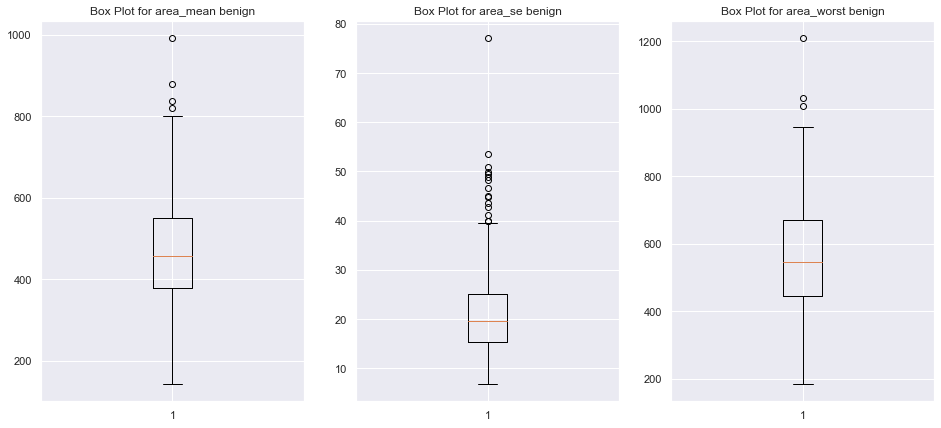

In [11]:
mask_malignant = df.diagnosis == 1

feature = list(features_dict.keys())[3]
plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)
plt.boxplot(df.loc[~mask_malignant, features_dict[feature][0]])
plt.title(f'Box Plot for {features_dict[feature][0]} benign')

plt.subplot(1, 3, 2)
plt.boxplot(df.loc[~mask_malignant, features_dict[feature][1]])
plt.title(f'Box Plot for {features_dict[feature][1]} benign')

plt.subplot(1, 3, 3)
plt.boxplot(df.loc[~mask_malignant, features_dict[feature][2]])
plt.title(f'Box Plot for {features_dict[feature][2]} benign')
plt.show()

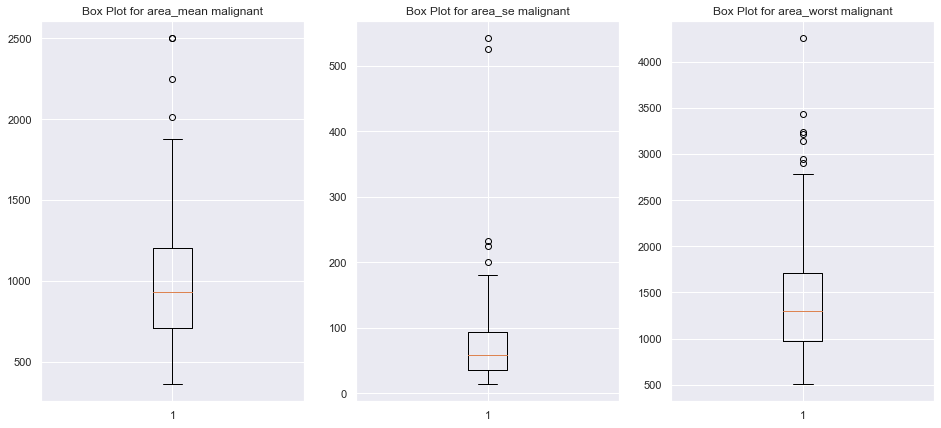

In [12]:
mask_malignant = df.diagnosis == 1

feature = list(features_dict.keys())[3]
plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)
plt.boxplot(df.loc[mask_malignant, features_dict[feature][0]])
plt.title(f'Box Plot for {features_dict[feature][0]} malignant')

plt.subplot(1, 3, 2)
plt.boxplot(df.loc[mask_malignant, features_dict[feature][1]])
plt.title(f'Box Plot for {features_dict[feature][1]} malignant')

plt.subplot(1, 3, 3)
plt.boxplot(df.loc[mask_malignant, features_dict[feature][2]])
plt.title(f'Box Plot for {features_dict[feature][2]} malignant')
plt.show()

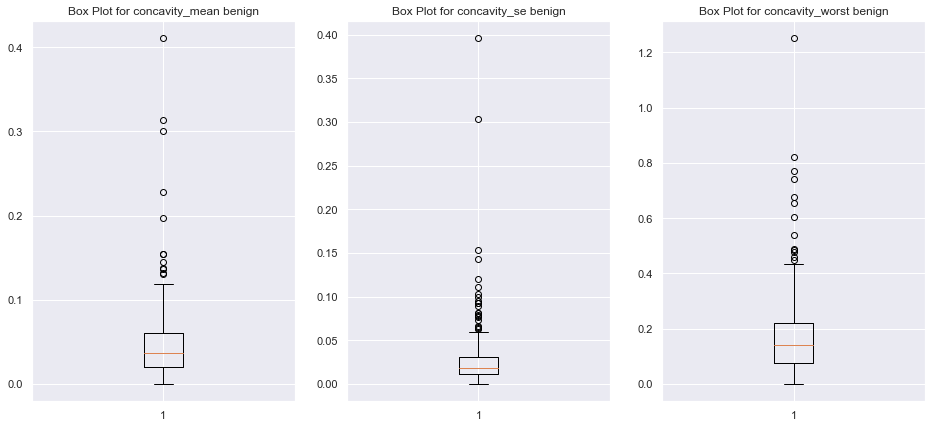

In [13]:
mask_malignant = df.diagnosis == 1
feature = list(features_dict.keys())[6]
plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)
plt.boxplot(df.loc[~mask_malignant, features_dict[feature][0]])
plt.title(f'Box Plot for {features_dict[feature][0]} benign')

plt.subplot(1, 3, 2)
plt.boxplot(df.loc[~mask_malignant, features_dict[feature][1]])
plt.title(f'Box Plot for {features_dict[feature][1]} benign')

plt.subplot(1, 3, 3)
plt.boxplot(df.loc[~mask_malignant, features_dict[feature][2]])
plt.title(f'Box Plot for {features_dict[feature][2]} benign')
plt.show()

### Histogrami

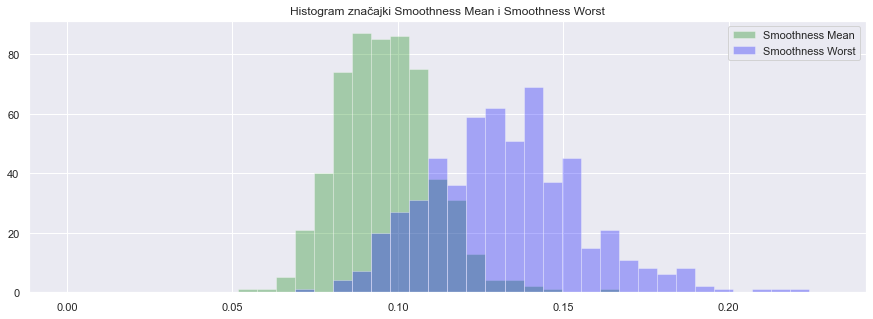

In [14]:
plt.figure(figsize=(15, 5))
plt.hist(df.smoothness_mean, bins=40, range=(0, 0.23), label='Smoothness Mean', color='green', alpha=0.3)
plt.hist(df.smoothness_worst, bins=40, range=(0, 0.23), label='Smoothness Worst', color='blue', alpha=0.3)
plt.legend(loc='best')
plt.title('Histogram značajki Smoothness Mean i Smoothness Worst')
plt.show()

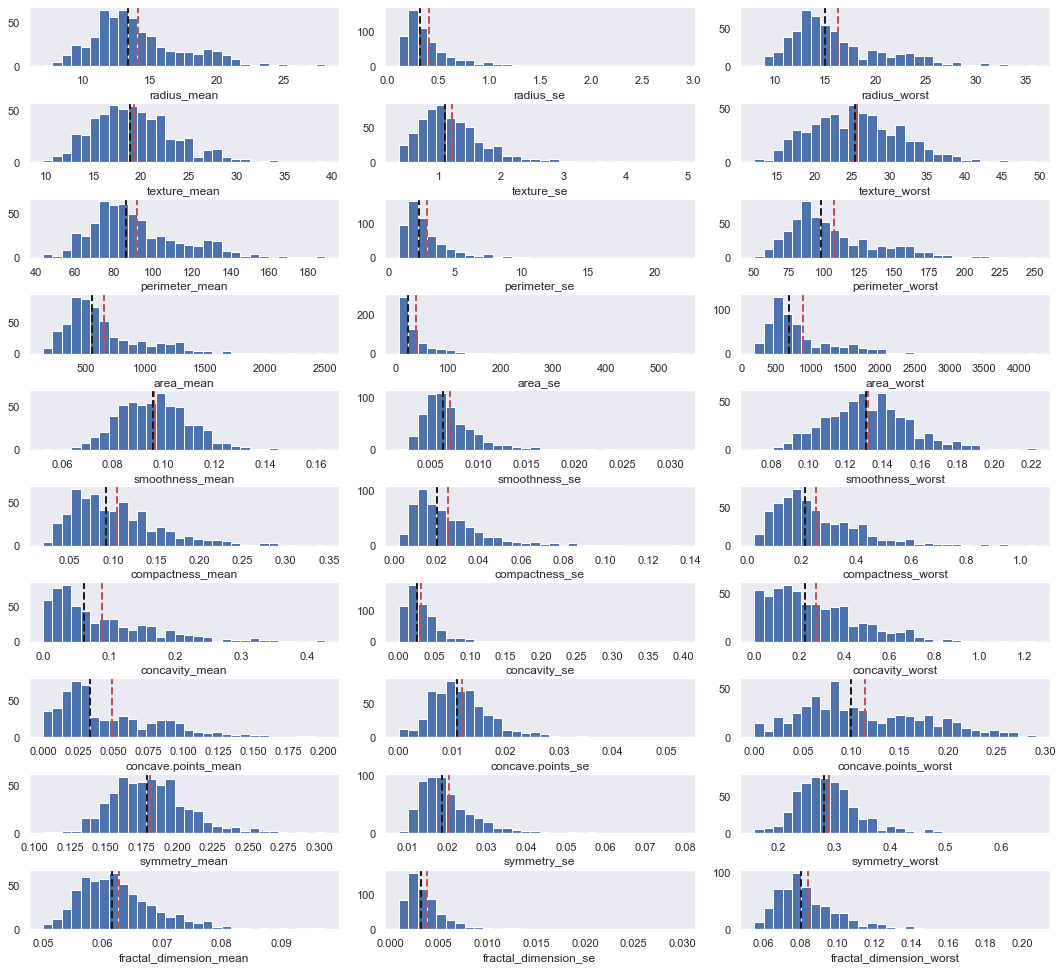

In [15]:
fig, ax = plt.subplots(10,3, figsize=(15,15))
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

keys = list(features_dict.keys())
for feature in keys:
    values = features_dict[feature]
    for f in values:
        ax[keys.index(feature), values.index(f)].hist(df[f], bins=30)
        ax[keys.index(feature), values.index(f)].grid()
        ax[keys.index(feature), values.index(f)].set_xlabel(f)
        ax[keys.index(feature), values.index(f)].axvline(df[f].mean(), color='r', linestyle='dashed', linewidth=2)
        ax[keys.index(feature), values.index(f)].axvline(df[f].median(), color='k', linestyle='dashed', linewidth=2)

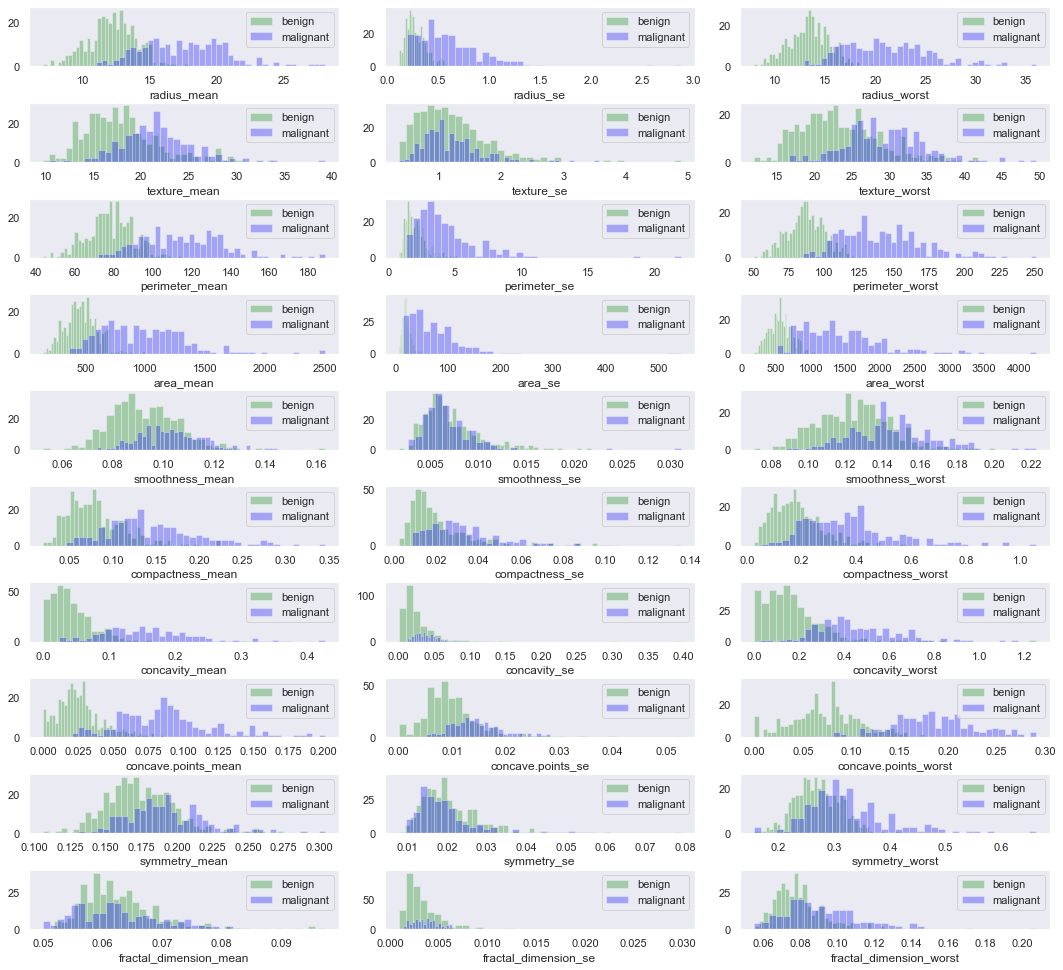

In [16]:
mask_malignant = df.diagnosis == 1
fig, ax = plt.subplots(10,3, figsize=(15,15))
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

keys = list(features_dict.keys())
for feature in keys:
    values = features_dict[feature]
    for f in values:
        ax[keys.index(feature), values.index(f)].hist(df.loc[~mask_malignant, f], bins=40, label='benign', 
                                                      color='green', alpha=0.3)
        ax[keys.index(feature), values.index(f)].hist(df.loc[mask_malignant, f], bins=40, label='malignant', 
                                                      color='blue', alpha=0.3)
        ax[keys.index(feature), values.index(f)].legend(loc='best')
        ax[keys.index(feature), values.index(f)].grid()
        ax[keys.index(feature), values.index(f)].set_xlabel(f)

### Graf raspršenja

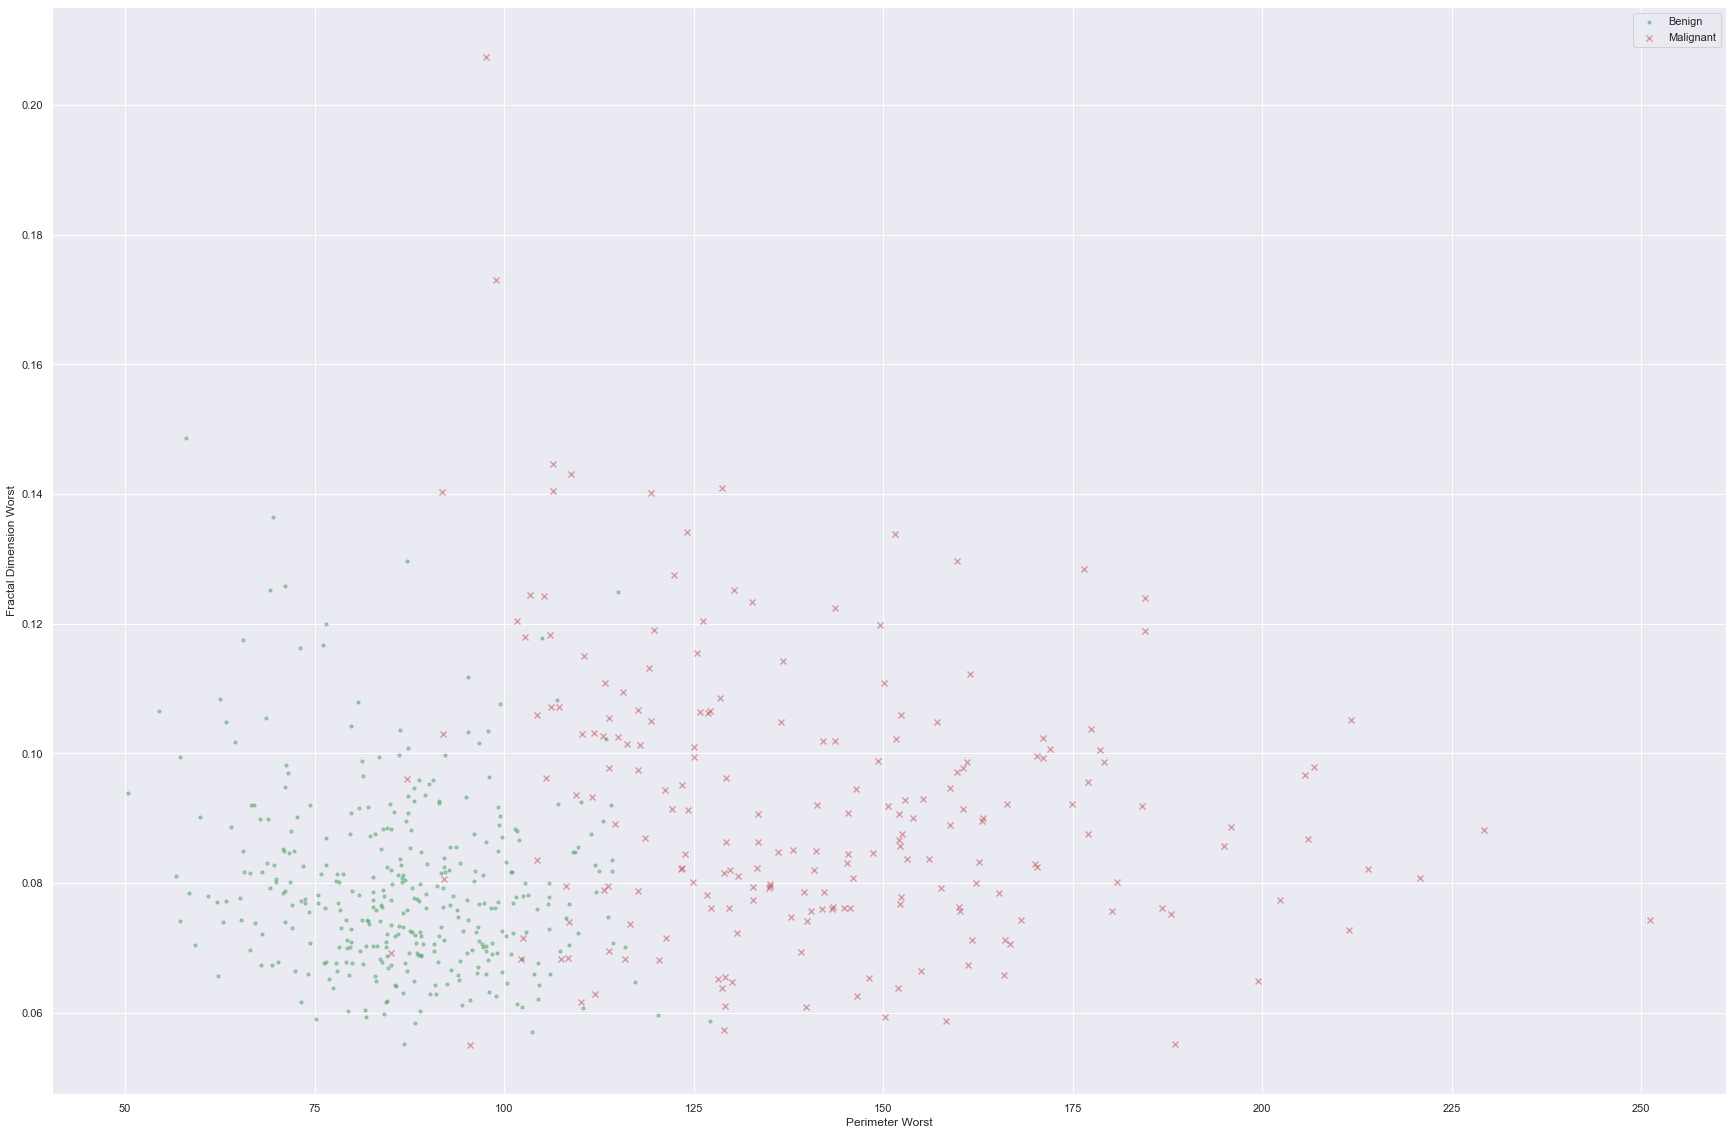

In [17]:
mask_malignant = df.diagnosis == 1

plt.scatter(df.loc[~mask_malignant,'perimeter_worst'], df.loc[~mask_malignant,'fractal_dimension_worst'], 
            s=10, alpha=0.5, c='g', label='Benign')
plt.scatter(df.loc[mask_malignant,'perimeter_worst'], df.loc[mask_malignant,'fractal_dimension_worst'],
            alpha=0.5, marker='x', c='r', label='Malignant')
plt.xlabel('Perimeter Worst')
plt.ylabel('Fractal Dimension Worst')
plt.legend(loc='best')
plt.show()

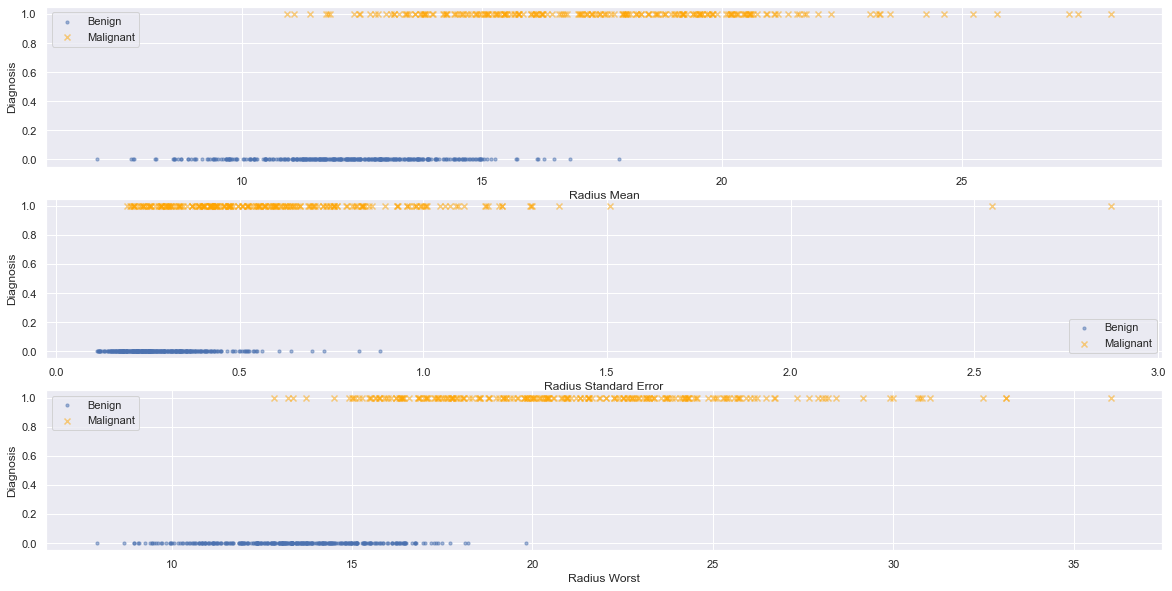

In [18]:
mask_malignant = df.diagnosis == 1

fig, ax = plt.subplots(3,1, figsize=(20,10)) 

ax[0].scatter(df.loc[~mask_malignant,'radius_mean'], df.loc[~mask_malignant,'diagnosis'], 
            s=10, alpha=0.5, c='b', label='Benign')
ax[0].scatter(df.loc[mask_malignant,'radius_mean'], df.loc[mask_malignant,'diagnosis'],
            alpha=0.5, marker='x', c='orange', label='Malignant')
ax[0].set_xlabel('Radius Mean')
ax[0].set_ylabel('Diagnosis')
ax[0].legend(loc='best')

ax[1].scatter(df.loc[~mask_malignant,'radius_se'], df.loc[~mask_malignant,'diagnosis'], 
            s=10, alpha=0.5, c='b', label='Benign')
ax[1].scatter(df.loc[mask_malignant,'radius_se'], df.loc[mask_malignant,'diagnosis'],
            alpha=0.5, marker='x', c='orange', label='Malignant')
ax[1].set_xlabel('Radius Standard Error')
ax[1].set_ylabel('Diagnosis')
ax[1].legend(loc='best')

ax[2].scatter(df.loc[~mask_malignant,'radius_worst'], df.loc[~mask_malignant,'diagnosis'], 
            s=10, alpha=0.5, c='b', label='Benign')
ax[2].scatter(df.loc[mask_malignant,'radius_worst'], df.loc[mask_malignant,'diagnosis'],
            alpha=0.5, marker='x', c='orange', label='Malignant')
ax[2].set_xlabel('Radius Worst')
ax[2].set_ylabel('Diagnosis')
ax[2].legend(loc='best')

plt.show()

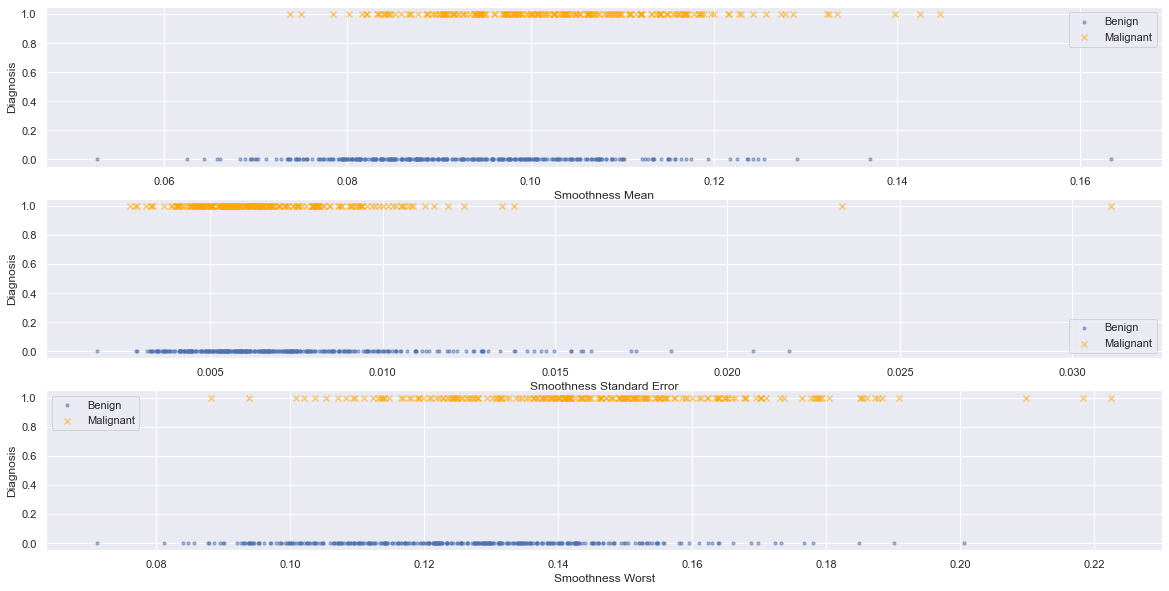

In [19]:
mask_malignant = df.diagnosis == 1

fig, ax = plt.subplots(3,1, figsize=(20,10)) 

ax[0].scatter(df.loc[~mask_malignant,'smoothness_mean'], df.loc[~mask_malignant,'diagnosis'], 
            s=10, alpha=0.5, c='b', label='Benign')
ax[0].scatter(df.loc[mask_malignant,'smoothness_mean'], df.loc[mask_malignant,'diagnosis'],
            alpha=0.5, marker='x', c='orange', label='Malignant')
ax[0].set_xlabel('Smoothness Mean')
ax[0].set_ylabel('Diagnosis')
ax[0].legend(loc='best')

ax[1].scatter(df.loc[~mask_malignant,'smoothness_se'], df.loc[~mask_malignant,'diagnosis'], 
            s=10, alpha=0.5, c='b', label='Benign')
ax[1].scatter(df.loc[mask_malignant,'smoothness_se'], df.loc[mask_malignant,'diagnosis'],
            alpha=0.5, marker='x', c='orange', label='Malignant')
ax[1].set_xlabel('Smoothness Standard Error')
ax[1].set_ylabel('Diagnosis')
ax[1].legend(loc='best')

ax[2].scatter(df.loc[~mask_malignant,'smoothness_worst'], df.loc[~mask_malignant,'diagnosis'], 
            s=10, alpha=0.5, c='b', label='Benign')
ax[2].scatter(df.loc[mask_malignant,'smoothness_worst'], df.loc[mask_malignant,'diagnosis'],
            alpha=0.5, marker='x', c='orange', label='Malignant')
ax[2].set_xlabel('Smoothness Worst')
ax[2].set_ylabel('Diagnosis')
ax[2].legend(loc='best')

plt.show()

### Mjehuričasti graf

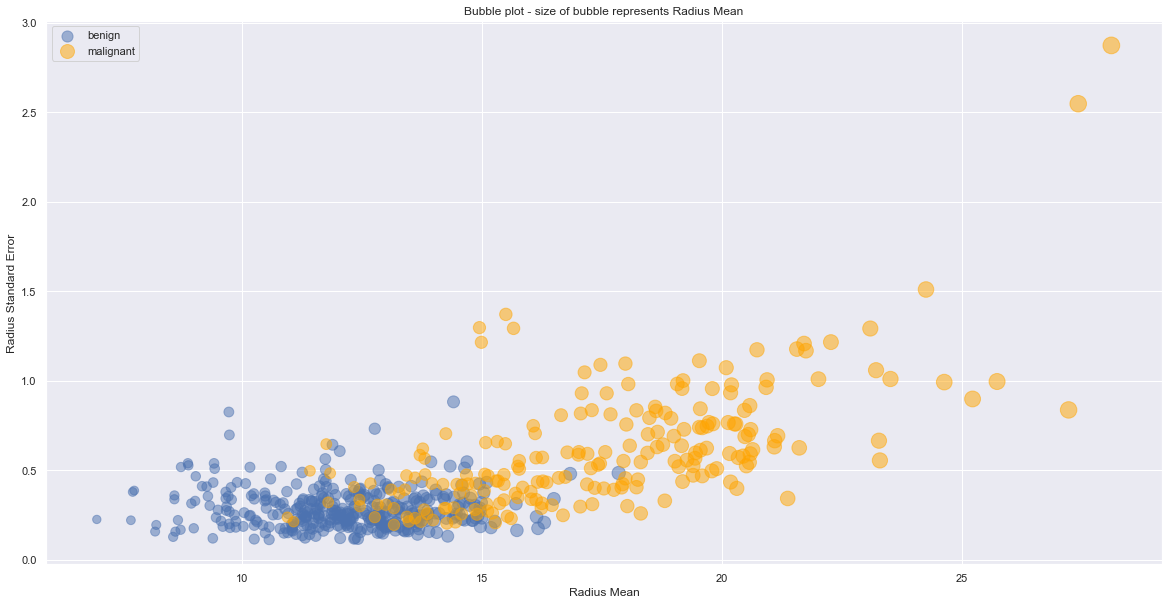

In [20]:
mask_malignant = df.diagnosis == 1
sizes = df.radius_mean * 10

plt.figure(figsize=(20, 10))
plt.scatter(df.loc[~mask_malignant,'radius_mean'], df.loc[~mask_malignant,'radius_se'],
            s=sizes[~mask_malignant], alpha=0.5, c='b', label='benign')
plt.scatter(df.loc[mask_malignant,'radius_mean'], df.loc[mask_malignant,'radius_se'],
            s=sizes[mask_malignant], alpha=0.5, c='orange', label='malignant')
plt.xlabel('Radius Mean')
plt.ylabel('Radius Standard Error')
plt.title('Bubble plot - size of bubble represents Radius Mean')
plt.legend(loc='best')
plt.show()

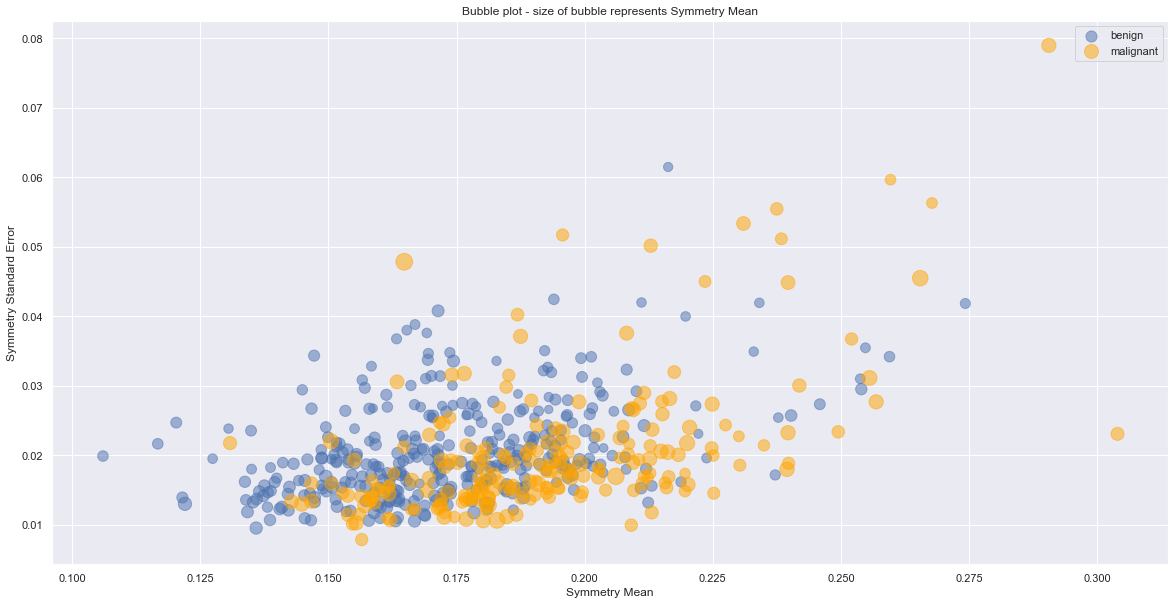

In [21]:
mask_malignant = df.diagnosis == 1
sizes = df.radius_mean * 10

plt.figure(figsize=(20, 10))
plt.scatter(df.loc[~mask_malignant,'symmetry_mean'], df.loc[~mask_malignant,'symmetry_se'],
            s=sizes[~mask_malignant], alpha=0.5, c='b', label='benign')
plt.scatter(df.loc[mask_malignant,'symmetry_mean'], df.loc[mask_malignant,'symmetry_se'],
            s=sizes[mask_malignant], alpha=0.5, c='orange', label='malignant')
plt.xlabel('Symmetry Mean')
plt.ylabel('Symmetry Standard Error')
plt.title('Bubble plot - size of bubble represents Symmetry Mean')
plt.legend(loc='best')
plt.show()

### Toplinska mapa

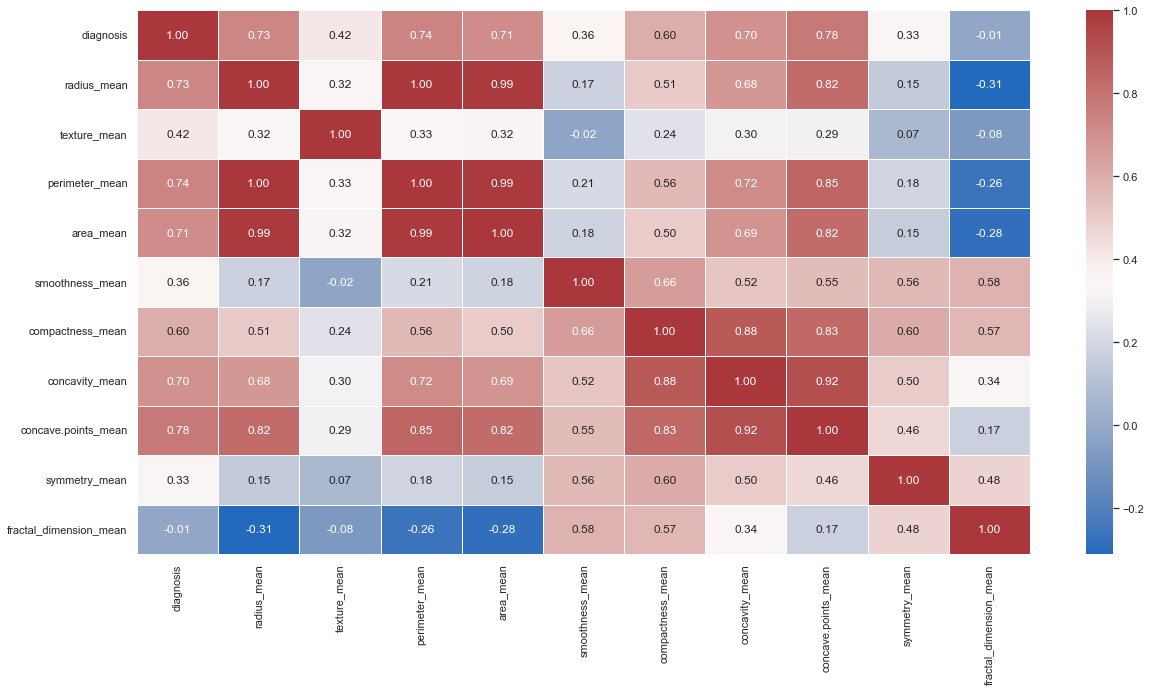

In [22]:
mean_features = ['diagnosis']
for n in names:
    if 'mean' in n:
        mean_features.append(n)
              
df_means = df.loc[:,df.columns.isin(mean_features)]
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_means.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="vlag")
plt.show()

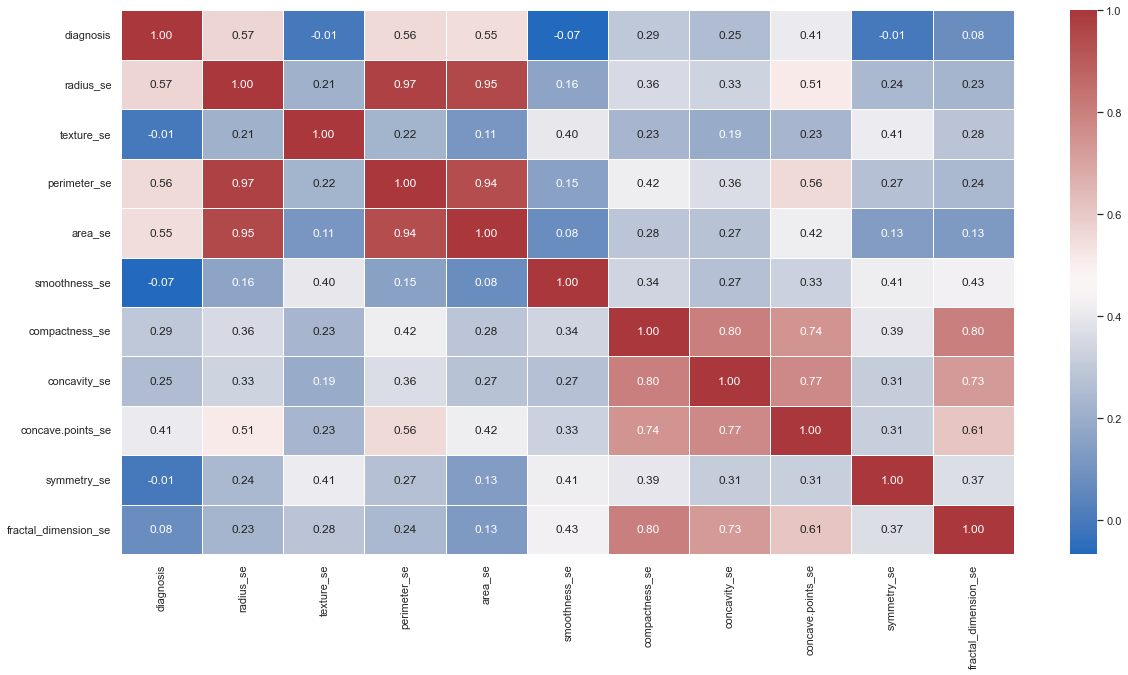

In [23]:
se_features = ['diagnosis']
for n in names:
    if '_se' in n:
        se_features.append(n)
              
df_se = df.loc[:,df.columns.isin(se_features)]
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_se.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="vlag")
plt.show()

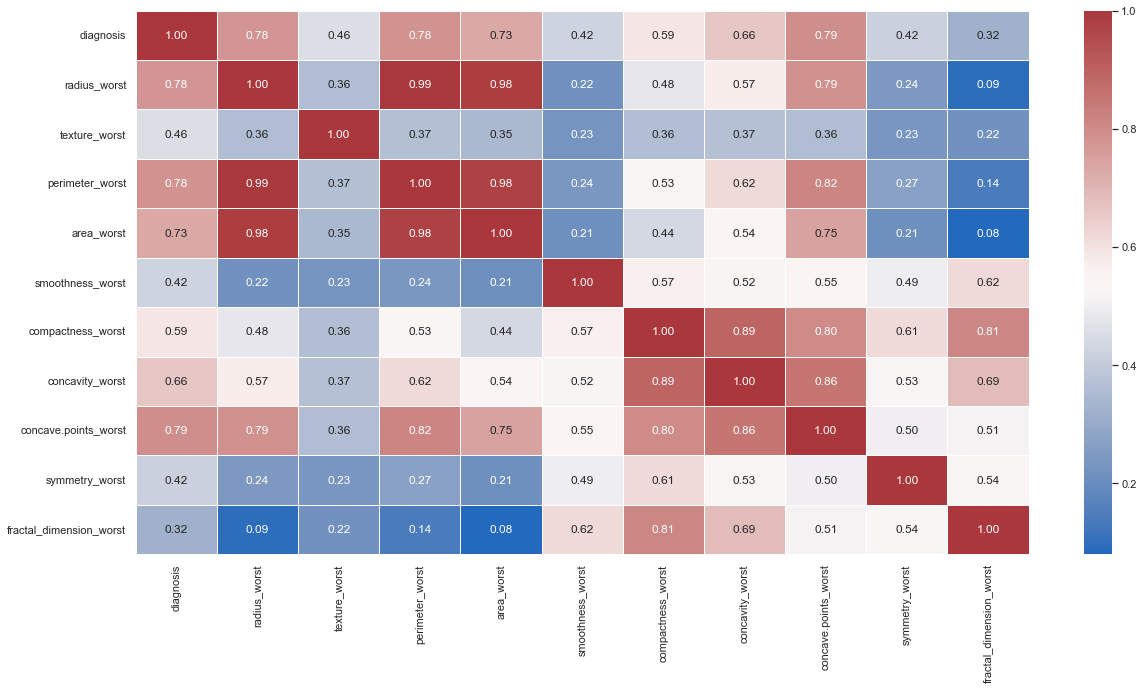

In [24]:
worst_features = ['diagnosis']
for n in names:
    if 'worst' in n:
        worst_features.append(n)
              
df_worst = df.loc[:,df.columns.isin(worst_features)]
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_worst.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="vlag")
plt.show()

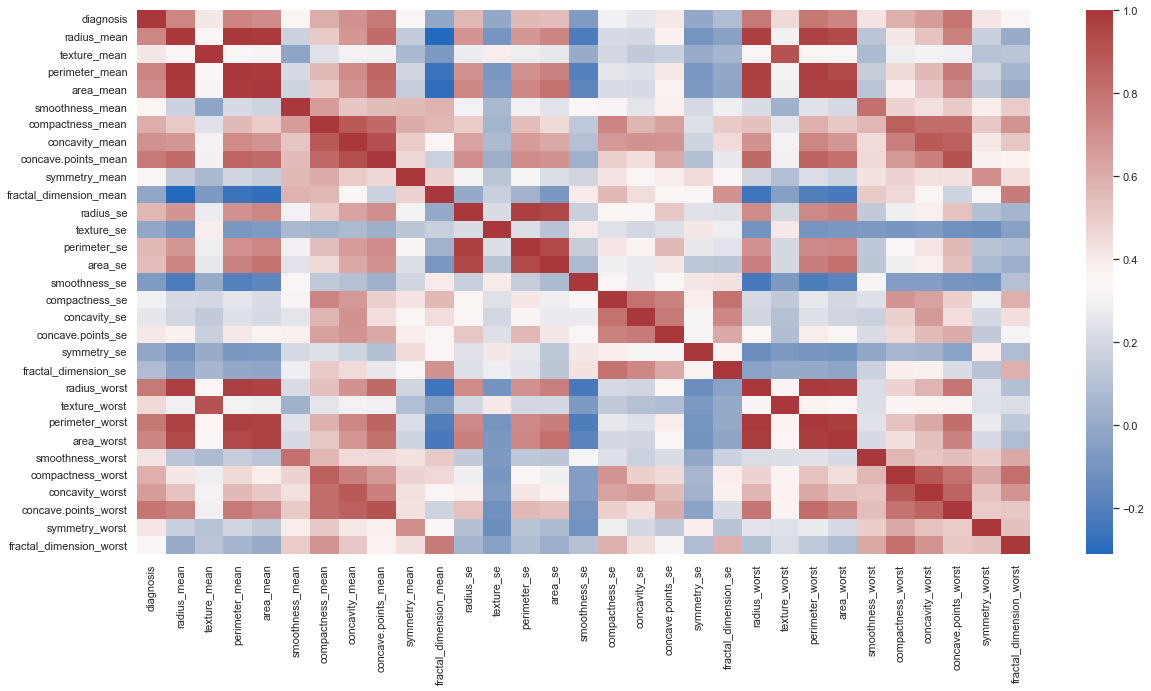

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), cmap="vlag")
plt.show()

Vidljiva je visoka koreliranost među varijablama 'radius', 'perimeter' i 'area' za svaku njihovu komponentu (mean, se i worst).

### Matrica dijagrama raspršenja

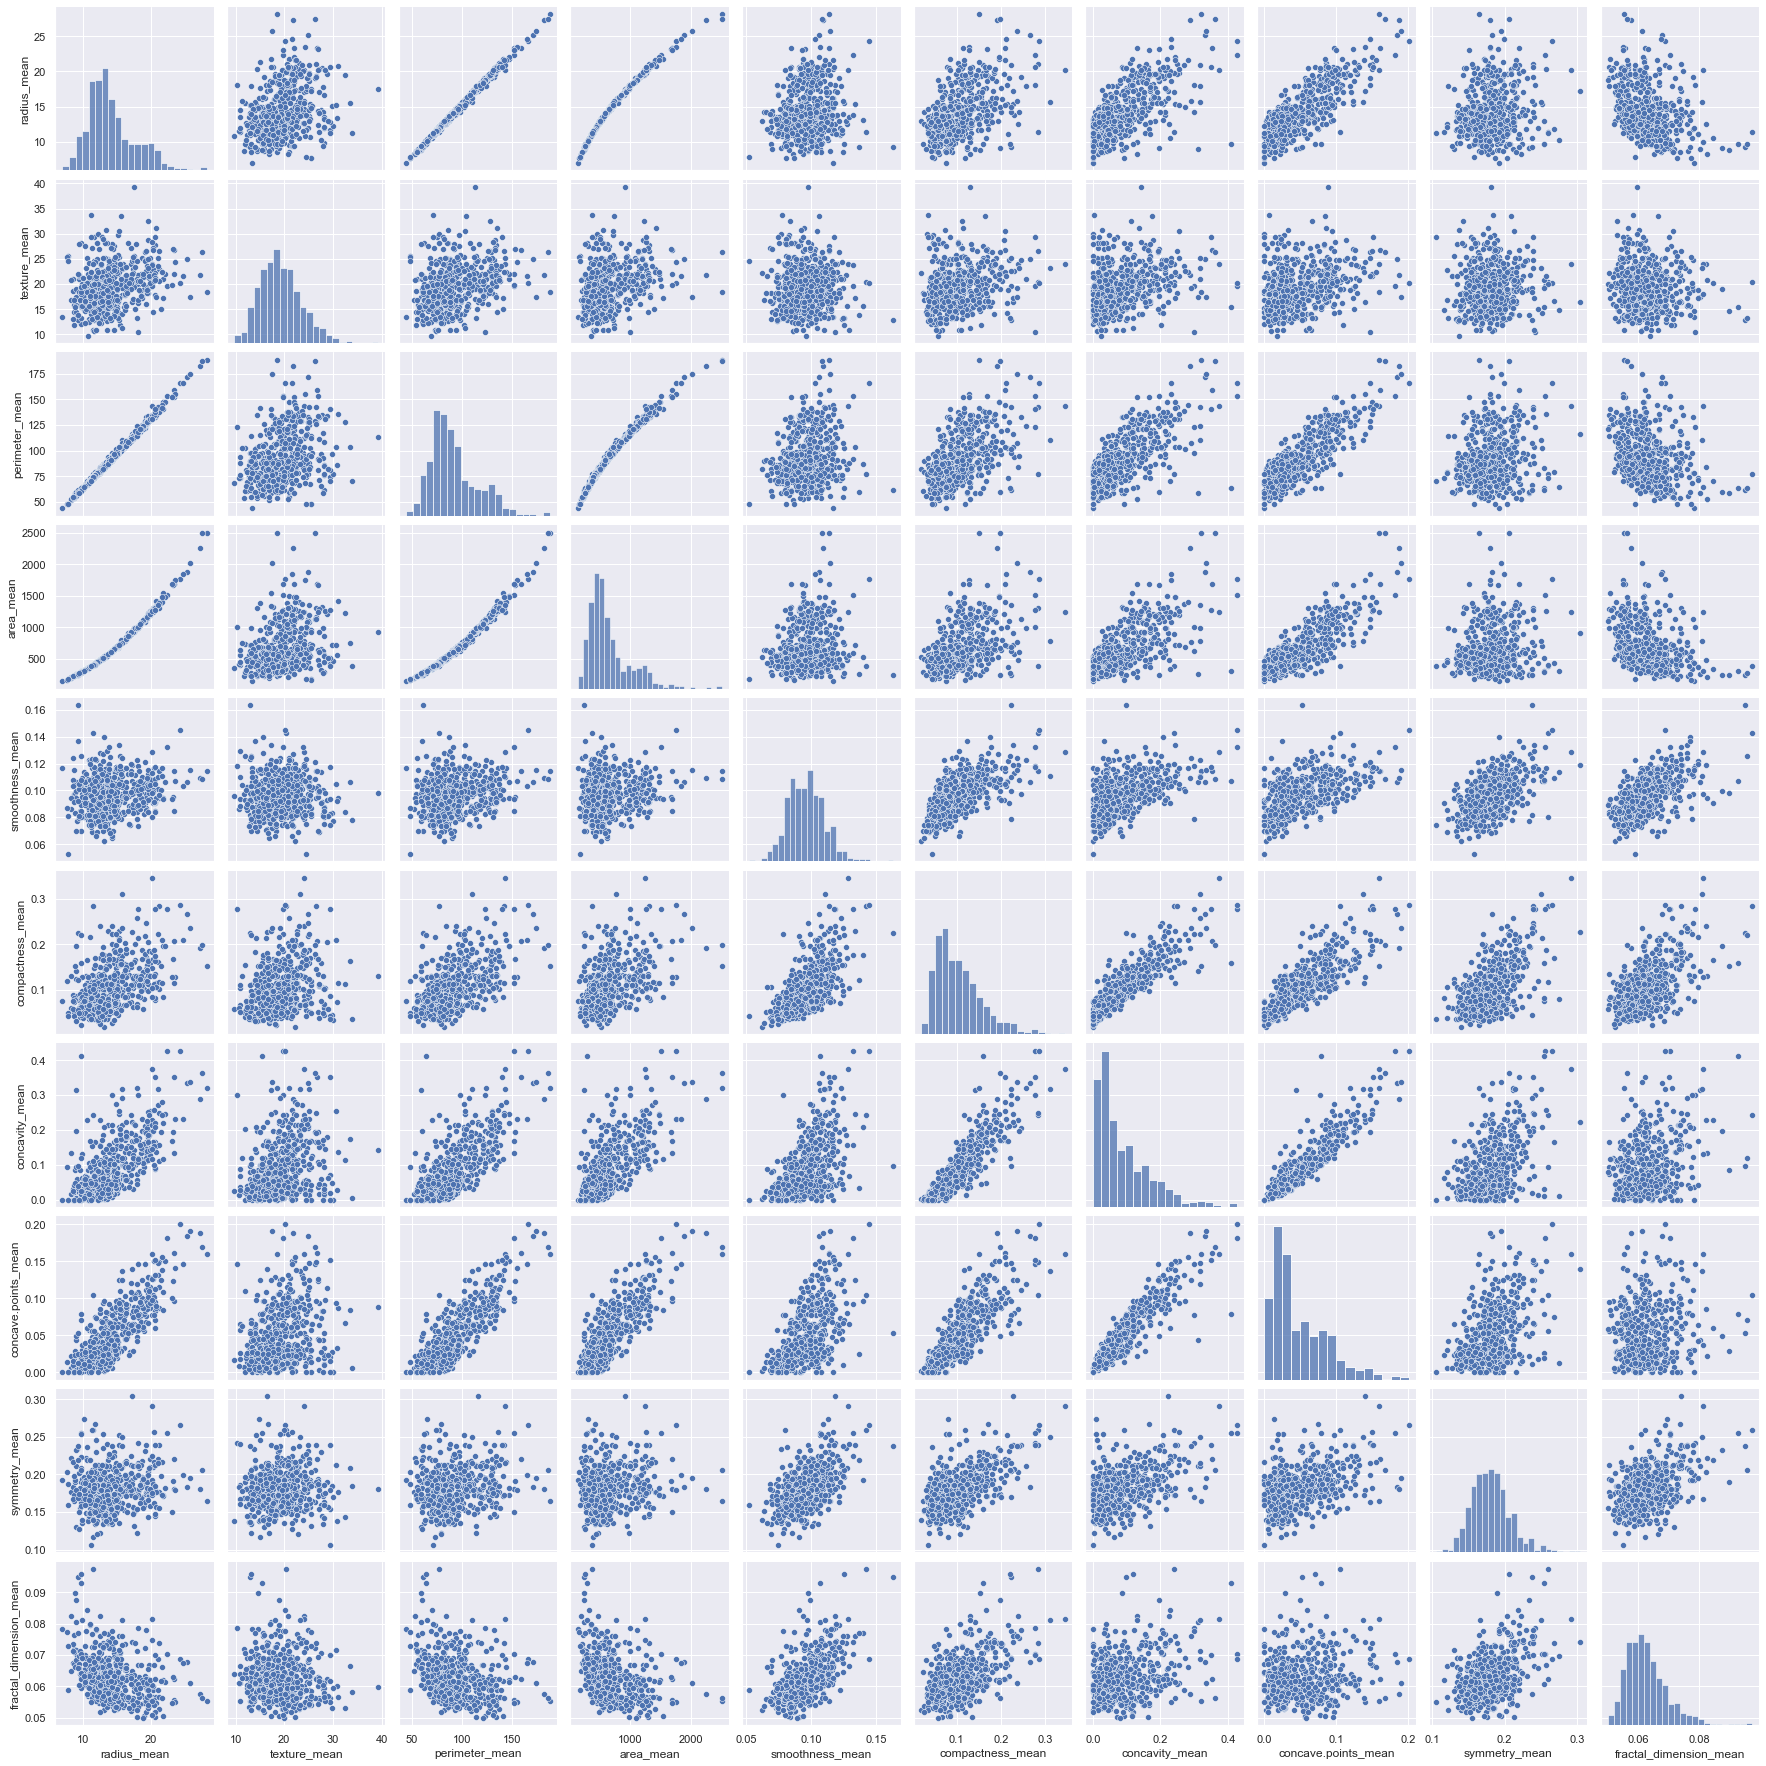

In [26]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(df_means.loc[:,~df_means.columns.isin(['diagnosis'])])
plt.show()

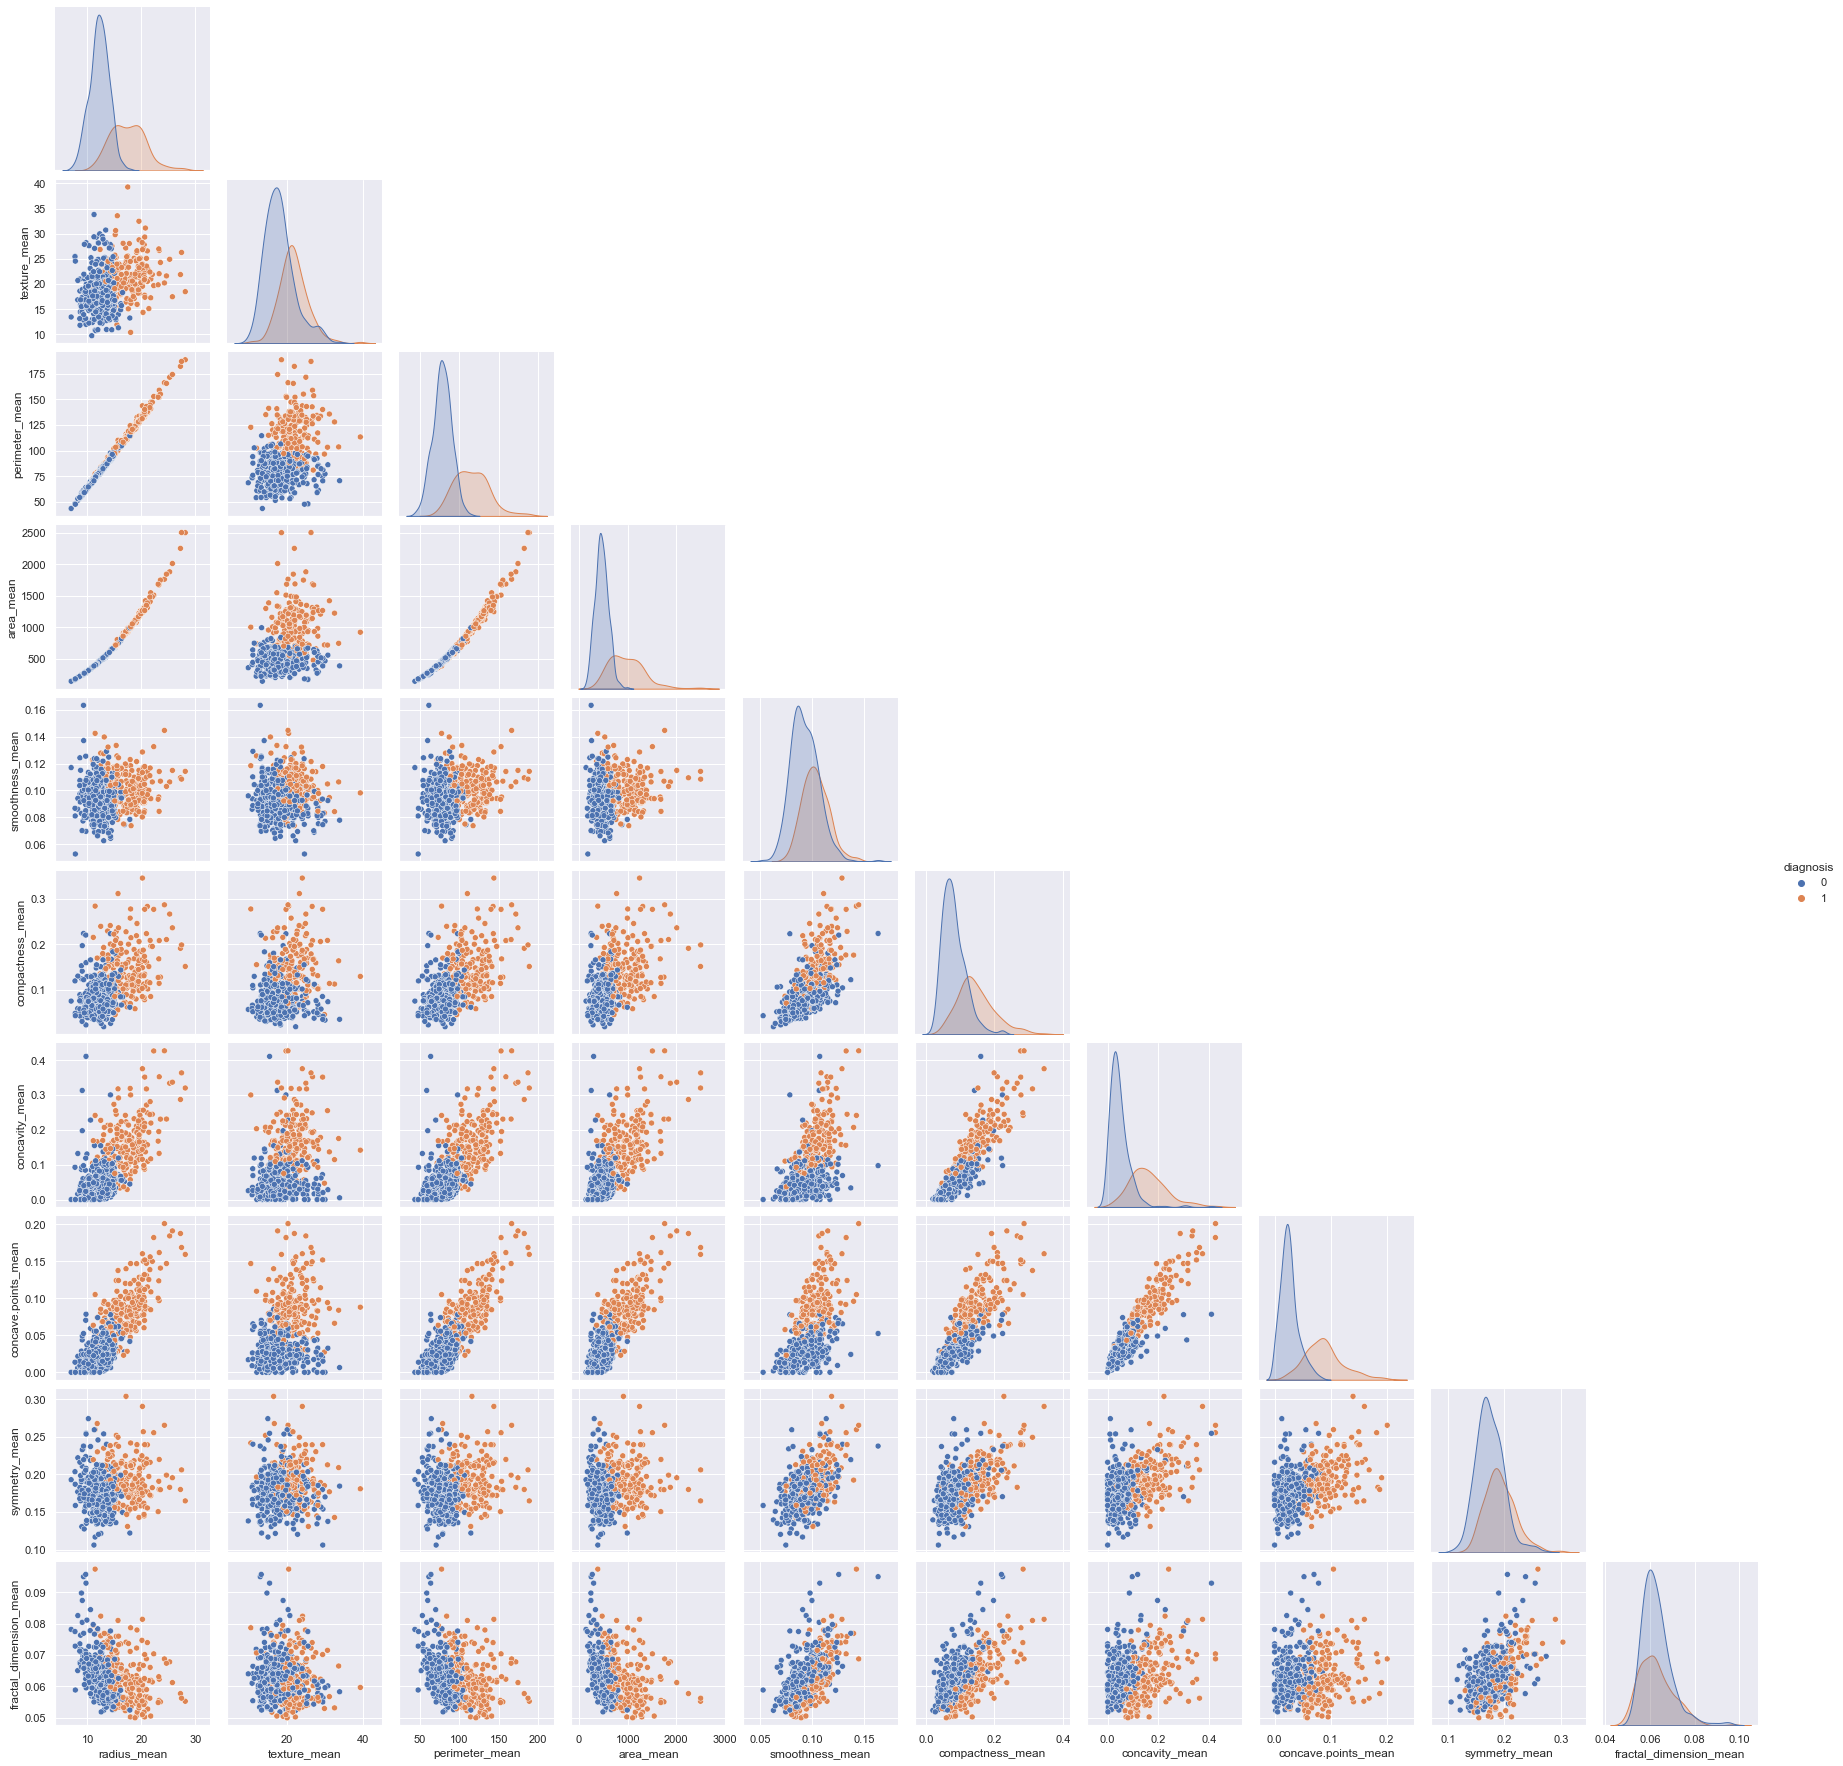

In [27]:
sns.set(rc={'figure.figsize':(30,20)})
sns.pairplot(df_means, hue="diagnosis", corner=True)
plt.show()

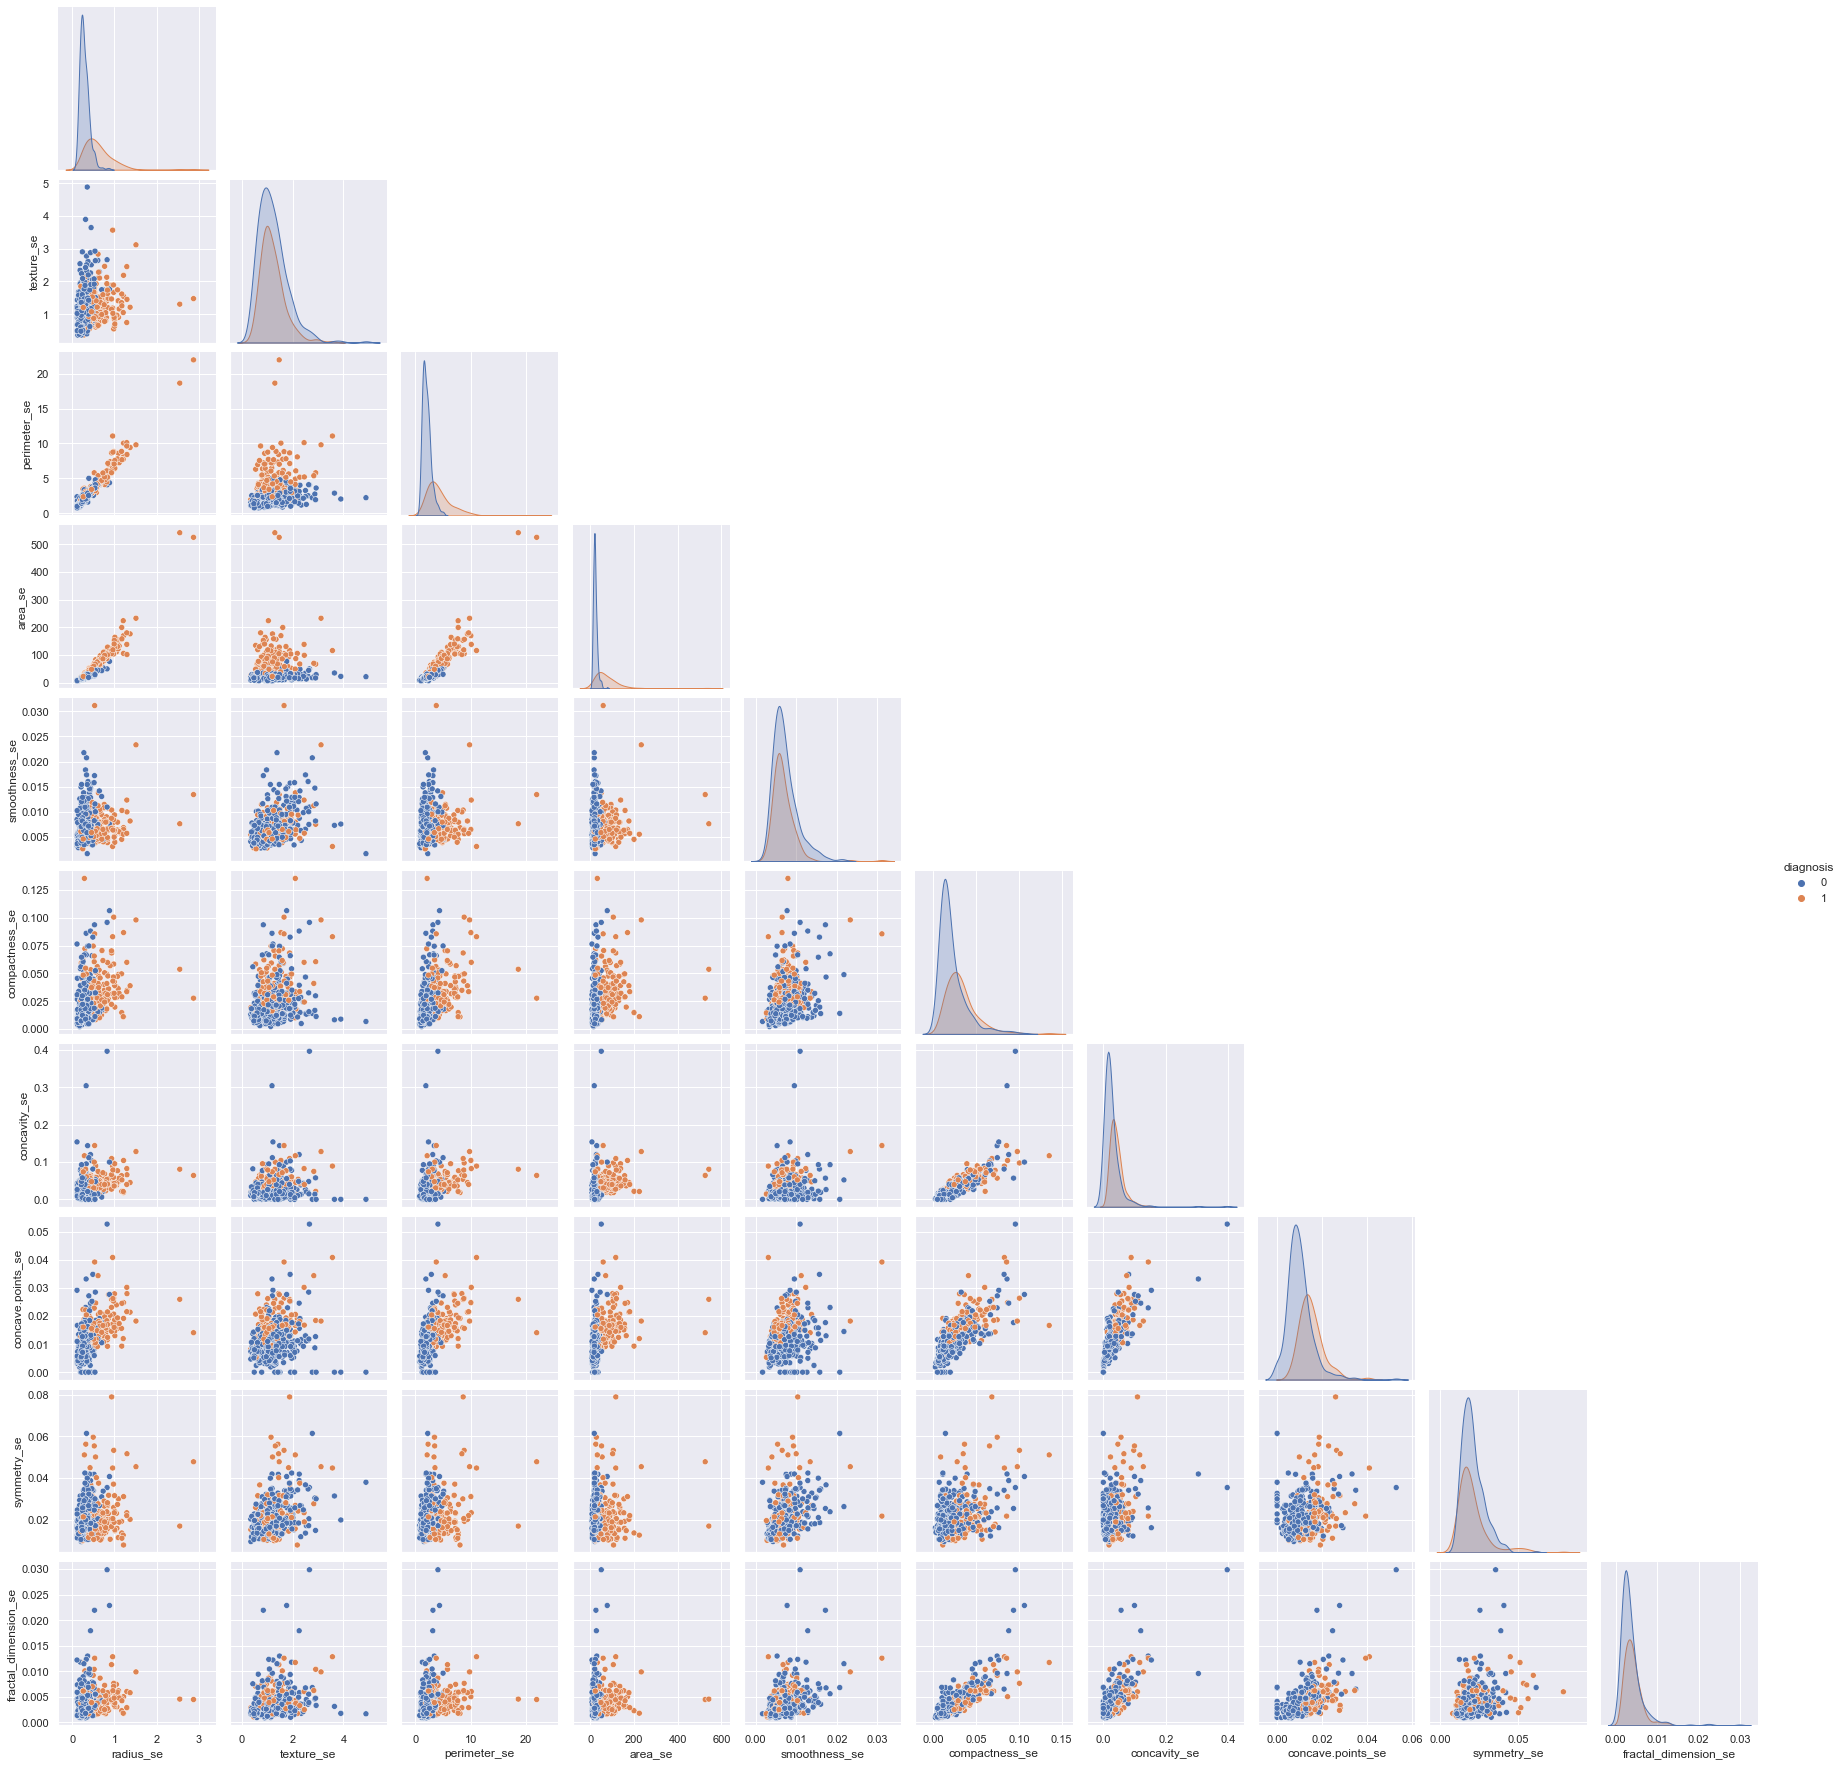

In [28]:
sns.set(rc={'figure.figsize':(30,20)})
sns.pairplot(df_se, hue="diagnosis", corner=True)
plt.show()

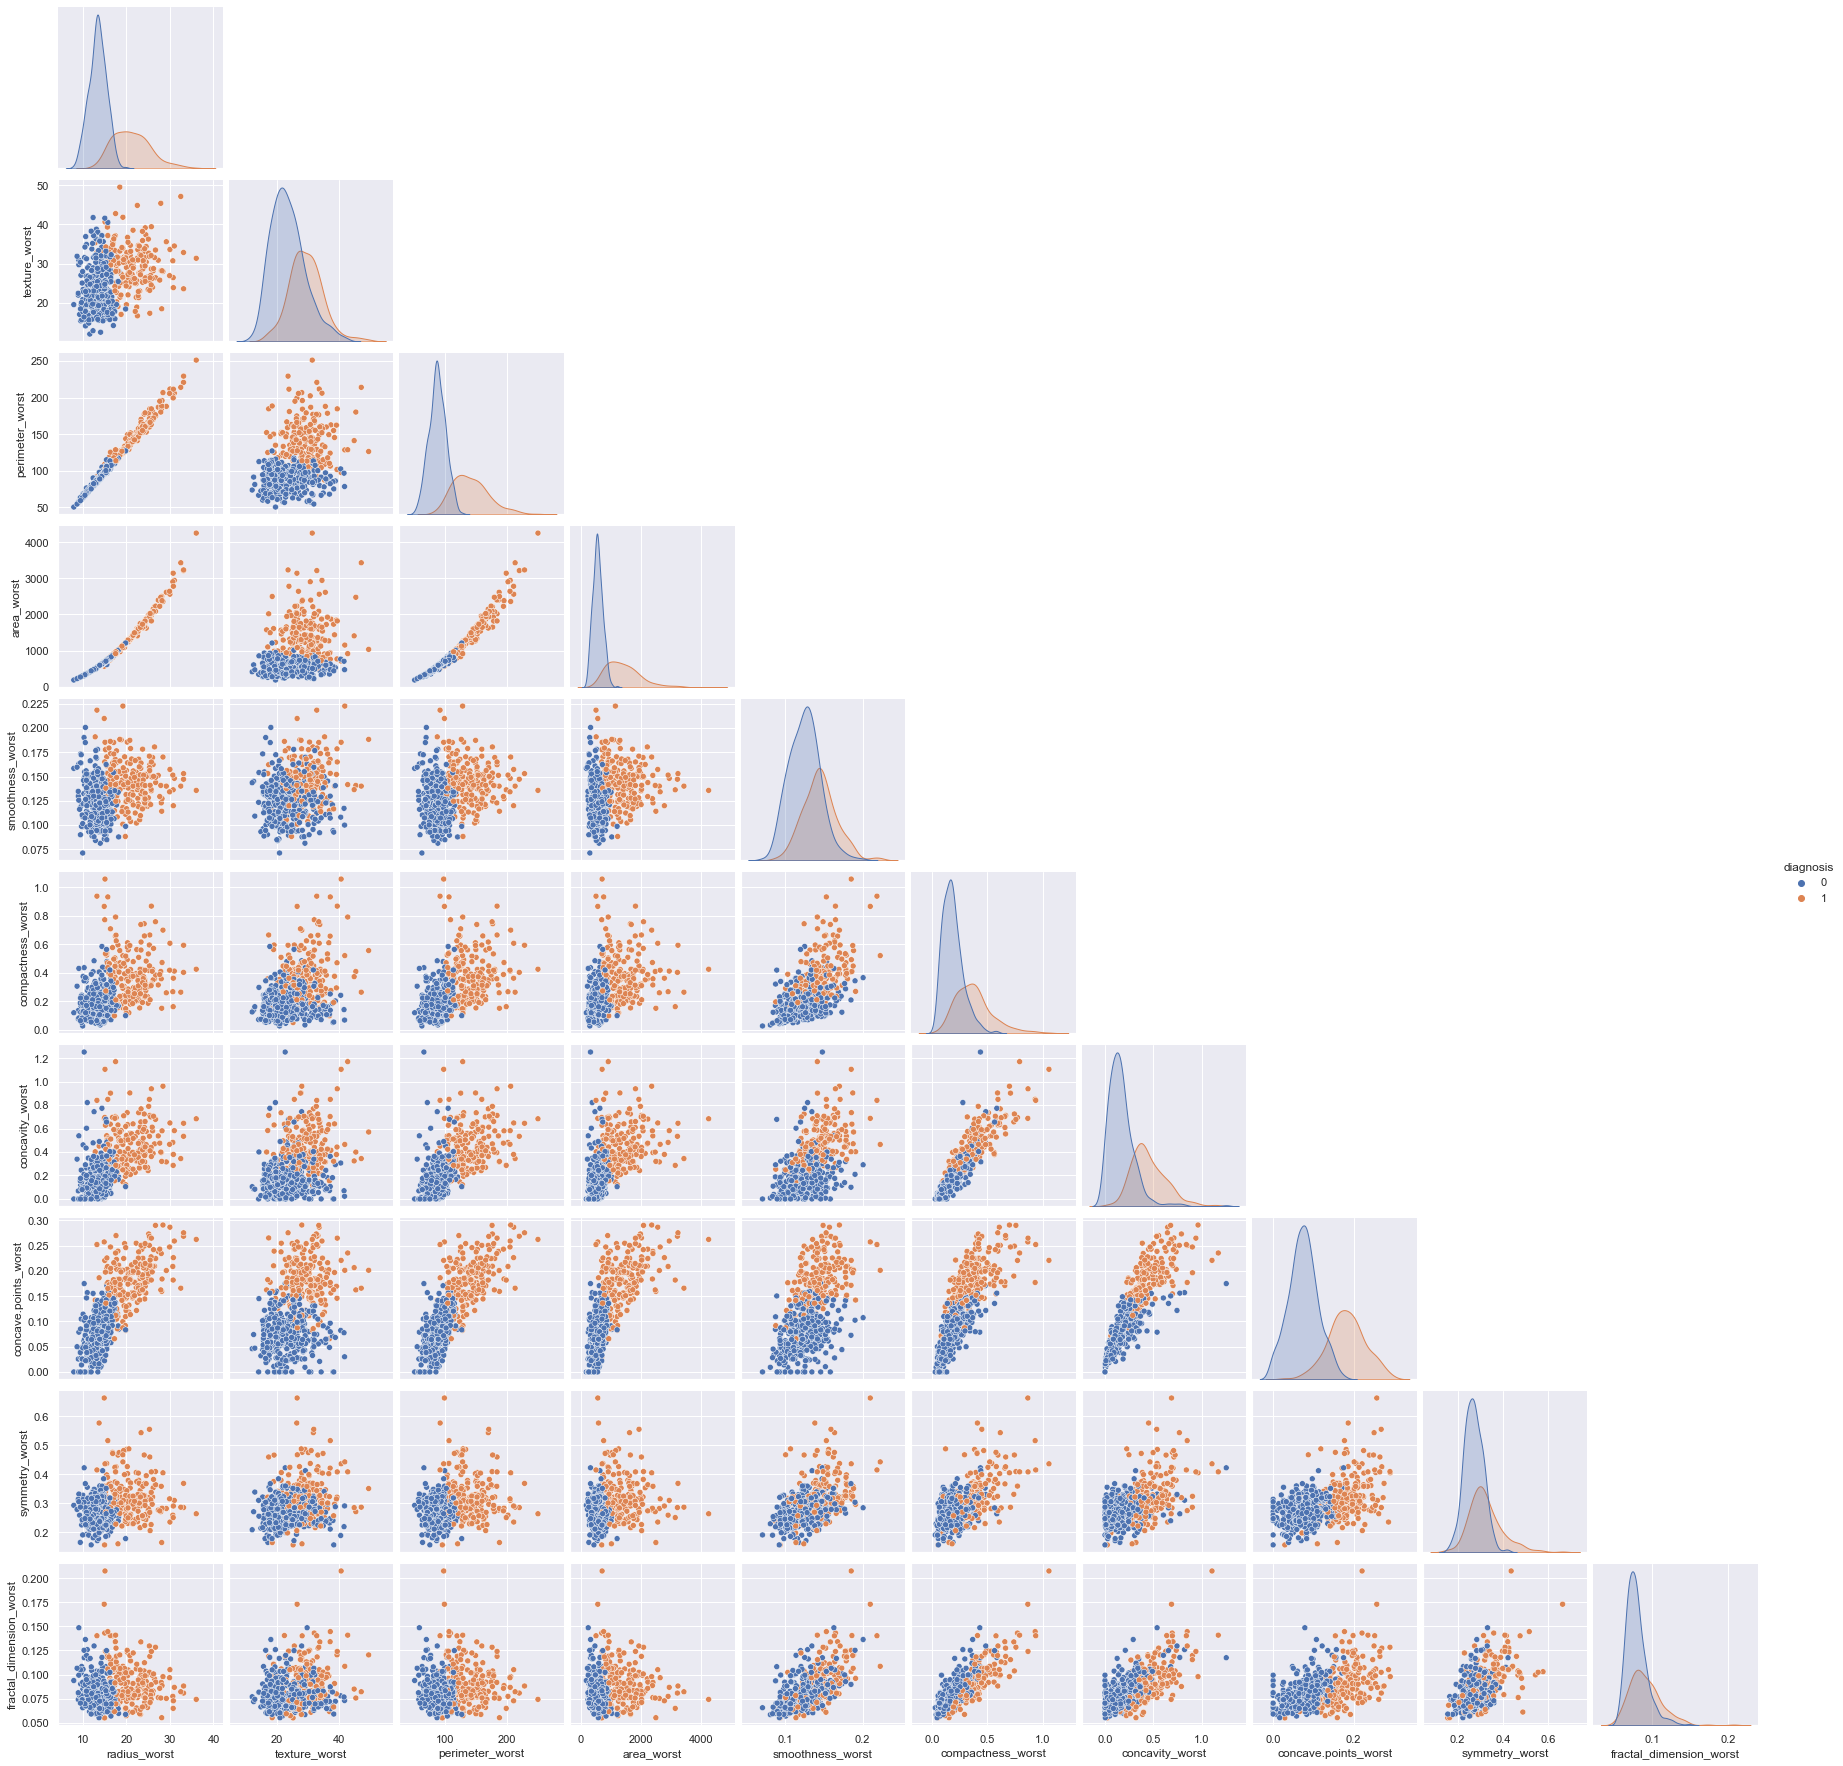

In [29]:
sns.set(rc={'figure.figsize':(30,20)})
sns.pairplot(df_worst, hue="diagnosis", corner=True)
plt.show()

## 2. Replikacija i vrednovanje rezultata
### 2.1. Priprema skupa podataka

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Iz toplinske mape vidljivo je koliko su koje značajke korelirane međusobno, ali i s ciljanom klasom. 

Izbacit ćemo one značajke koje imaju premalu koreliranost (bila ona negativna ili pozitivna) s ciljanom klasom, a to su fractal_dimension_mean, texture_se i symmetry_se. Kriterij za premalu koreliranost je da je njen iznos 0.01 ili manji.

Također ćemo izbaciti značajke koje su međusobno visoko korelirane po kriteriju da od dvije visoko korelirane značajke izbacimo onu koja je manje korelirana s ciljanom klasom. Kriterij za visoku koreliranost dviju značajki je da je iznos korelacije 0.99 ili veći. Tako izbacujemo značajke radius_mean, area_mean i perimeter_worst.

In [31]:
df = df.drop(columns=['fractal_dimension_mean', 'texture_se', 'symmetry_se', 'radius_mean', 'area_mean', 'perimeter_worst'])
df.head()

diagnosis  texture_mean  perimeter_mean  smoothness_mean  \
842302            1         10.38          122.80          0.11840   
842517            1         17.77          132.90          0.08474   
84300903          1         21.25          130.00          0.10960   
84348301          1         20.38           77.58          0.14250   
84358402          1         14.34          135.10          0.10030   

          compactness_mean  concavity_mean  concave.points_mean  \
842302             0.27760          0.3001              0.14710   
842517             0.07864          0.0869              0.07017   
84300903           0.15990          0.1974              0.12790   
84348301           0.28390          0.2414              0.10520   
84358402           0.13280          0.1980              0.10430   

          symmetry_mean  radius_se  perimeter_se  area_se  smoothness_se  \
842302           0.2419     1.0950         8.589   153.40       0.006399   
842517           0.1812     0.5435         3.398    74.08       0.005225   
84300903         0.2069     0.7456         4.585    94.03       0.006150   
84348301         0.2597     0.4956         3.445    27.23       0.009110   
84358402         0.1809     0.7572         5.438    94.44       0.011490   

          compactness_se  concavity_se  concave.points_se  \
842302           0.04904       0.05373            0.01587   
842517           0.01308       0.01860            0.01340   
84300903         0.04006       0.03832            0.02058   
84348301         0.07458       0.05661            0.01867   
84358402         0.02461       0.05688            0.01885   

          fractal_dimension_se  radius_worst  texture_worst  area_worst  \
842302                0.006193         25.38          17.33      2019.0   
842517                0.003532         24.99          23.41      1956.0   
84300903              0.004571         23.57          25.53      1709.0   
84348301              0.009208         14.91          26.50       567.7   
84358402              0.005115         22.54          16.67      1575.0   

          smoothness_worst  compactness_worst  concavity_worst  \
842302              0.1622             0.6656           0.7119   
842517              0.1238             0.1866           0.2416   
84300903            0.1444             0.4245           0.4504   
84348301            0.2098             0.8663           0.6869   
84358402            0.1374             0.2050           0.4000   

          concave.points_worst  symmetry_worst  fractal_dimension_worst  
842302                  0.2654          0.4601                  0.11890  
842517                  0.1860          0.2750                  0.08902  
84300903                0.2430          0.3613                  0.08758  
84348301                0.2575          0.6638                  0.17300  
84358402                0.1625          0.2364                  0.07678

Podjela skupa podataka na skup za učenje i skup za ispitivanje, skaliranje.

In [32]:
X = df.loc[:, df.columns != 'diagnosis']
y = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.2. Treniranje modela

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Unakrsna provjera za logističku regresiju:

In [34]:
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
params = {'penalty': ['l1', 'l2'], 'C': [1, 10], 'solver': ['lbfgs', 'liblinear']}
logreg = LogisticRegression()
cv = GridSearchCV(logreg, params).fit(X_train, y_train)
cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Unakrsna provjera za Random Forest:

In [35]:
params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 30, 50, 70, 90, None]}
rndforest = RandomForestClassifier()
cv = GridSearchCV(rndforest, params).fit(X_train, y_train)
cv.best_params_

{'max_depth': 70, 'n_estimators': 100}

Unakrsna provjera za Decision Tree:

In [36]:
params = {'max_depth': [50, 70, 90, 100, 110, 120, None]}
dectree = DecisionTreeClassifier()
cv = GridSearchCV(dectree, params).fit(X_train, y_train)
cv.best_params_

{'max_depth': 120}

Unakrsna provjera za SVM:

In [37]:
params = {'kernel': ['rbf', 'poly', 'linear'], 'C': [1, 10]}
svc = SVC()
cv = GridSearchCV(svc, params).fit(X_train, y_train)
cv.best_params_

{'C': 10, 'kernel': 'linear'}

Unakrsna provjera za KNN:

In [38]:
params = {'n_neighbors' : [3, 5, 7, 9, 11]}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn, params).fit(X_train, y_train)
cv.best_params_

{'n_neighbors': 7}

Treniranje modela s odabranim hiperparametrima:

In [39]:
clf_logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear').fit(X_train, y_train)
clf_rndforest = RandomForestClassifier(n_estimators=100, max_depth=None).fit(X_train, y_train)
clf_dectree = DecisionTreeClassifier(max_depth=100).fit(X_train, y_train)
clf_bayes = GaussianNB().fit(X_train, y_train)
clf_svm = SVC(C=10, kernel='linear', probability=True).fit(X_train, y_train)
clf_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [40]:
pred_train_logreg = clf_logreg.predict(X_train)
pred_train_rndforest = clf_rndforest.predict(X_train)
pred_train_dectree = clf_dectree.predict(X_train)
pred_train_bayes = clf_bayes.predict(X_train)
pred_train_svm = clf_svm.predict(X_train)
pred_train_knn = clf_knn.predict(X_train)

In [41]:
pred_test_logreg = clf_logreg.predict(X_test)
pred_test_rndforest = clf_rndforest.predict(X_test)
pred_test_dectree = clf_dectree.predict(X_test)
pred_test_bayes = clf_bayes.predict(X_test)
pred_test_svm = clf_svm.predict(X_test)
pred_test_knn = clf_knn.predict(X_test)

### 2.3. Vrednovanje rezultata

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

#### Accuracy

In [43]:
print('Algorithms\t\t  Training Accuracy\t  Testing Accuracy')
print('Logistic Regression\t\t{0}%\t\t\t{1}%'
      .format((round(accuracy_score(y_train, pred_train_logreg)*100, 1))
            , (round(accuracy_score(y_test, pred_test_logreg)*100, 1))))
print('Random Forest\t\t\t{0}%\t\t\t{1}%'
      .format((round(accuracy_score(y_train, pred_train_rndforest)*100, 1))
            , (round(accuracy_score(y_test, pred_test_rndforest)*100, 1))))
print('Decision Tree\t\t\t{0}%\t\t\t{1}%'
      .format((round(accuracy_score(y_train, pred_train_dectree)*100, 1))
            , (round(accuracy_score(y_test, pred_test_dectree)*100, 1))))
print('Naive Bayes\t\t\t{0}%\t\t\t{1}%'
      .format((round(accuracy_score(y_train, pred_train_bayes)*100, 1))
            , (round(accuracy_score(y_test, pred_test_bayes)*100, 1))))
print('SVM\t\t\t\t{0}%\t\t\t{1}%'
      .format((round(accuracy_score(y_train, pred_train_svm)*100, 1))
            , (round(accuracy_score(y_test, pred_test_svm)*100, 1))))
print('KNN\t\t\t\t{0}%\t\t\t{1}%'
      .format((round(accuracy_score(y_train, pred_train_knn)*100, 1))
            , (round(accuracy_score(y_test, pred_test_knn)*100, 1))))

Algorithms		  Training Accuracy	  Testing Accuracy
Logistic Regression		98.8%			97.2%
Random Forest			100.0%			97.2%
Decision Tree			100.0%			95.1%
Naive Bayes			92.5%			93.7%
SVM				99.1%			96.5%
KNN				97.4%			97.2%


Rezultati na skupu za ispitivanje se razlikuju od onih u članku tako da su jednaki ili bolji, a rezultati na skupu za učenje su u nekim slučajevima gori od onih u članku što nije loše (dok je točnost na skupu za ispitivanje jednaka ili bolja od one u članku) jer samo znači da je model manje složenosti, a generalizira bolje.

Razlike u dobivenim rezultatima mogle su nastati iz više razloga:
   - 1 ) Podjela skupa podataka na skup za učenje i ispitivanje radi se slučajnom raspodjelom pa su modeli učili iz različitih podataka te različito generaliziraju
   - 2 ) Odabrani su različiti hiperparametri
   - 3 ) Različite značajke su izbačene iz prvotnog skupa podataka (ili nisu izbačene)
   - 4 ) Podaci nisu skalirani na isti način (ili nisu skalirani uopće) 

#### Matrica zabune (confusion matrix)

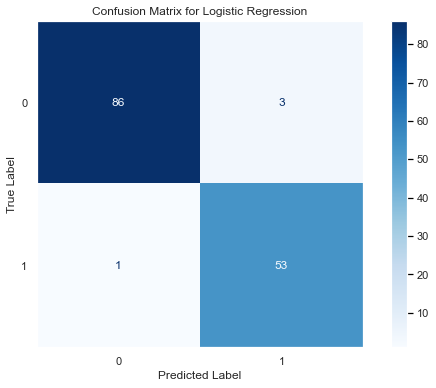

In [44]:
matrix = plot_confusion_matrix(clf_logreg, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)
plt.grid()

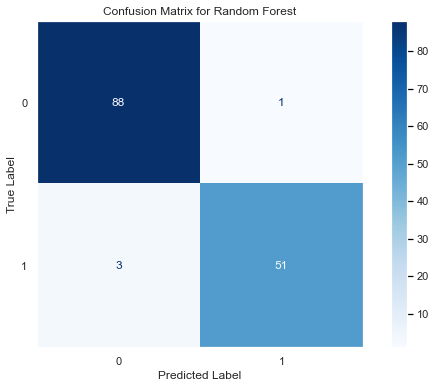

In [45]:
matrix = plot_confusion_matrix(clf_rndforest, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)
plt.grid()

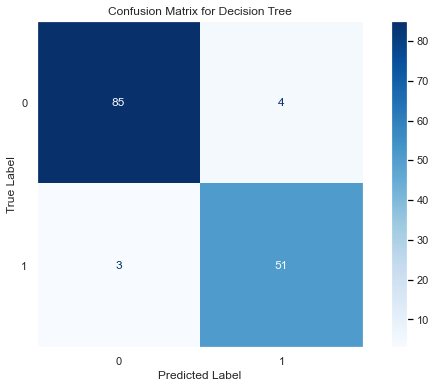

In [46]:
matrix = plot_confusion_matrix(clf_dectree, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)
plt.grid()

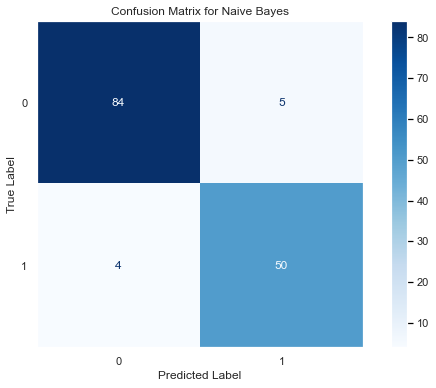

In [47]:
matrix = plot_confusion_matrix(clf_bayes, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)
plt.grid()

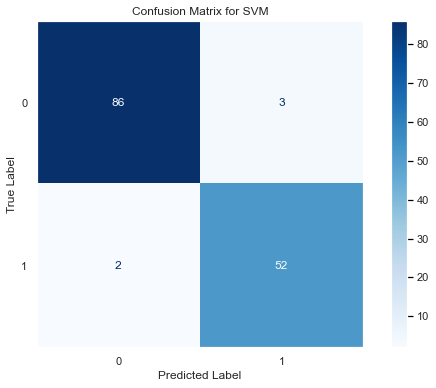

In [48]:
matrix = plot_confusion_matrix(clf_svm, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)
plt.grid()

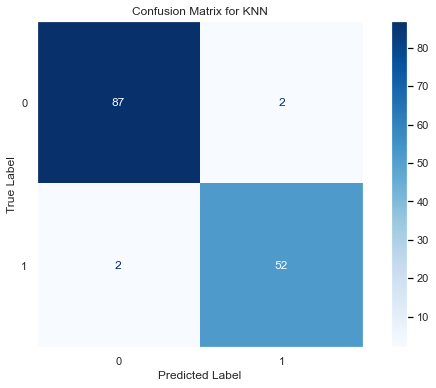

In [49]:
matrix = plot_confusion_matrix(clf_knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)
plt.grid()

#### Precision (preciznost), recall (odziv), F1 score

In [50]:
print(classification_report(y_test, pred_test_logreg))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [51]:
print(classification_report(y_test, pred_test_rndforest))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [52]:
print(classification_report(y_test, pred_test_dectree))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [53]:
print(classification_report(y_test, pred_test_bayes))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        89
           1       0.91      0.93      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [54]:
print(classification_report(y_test, pred_test_svm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        89
           1       0.95      0.96      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(classification_report(y_test, pred_test_knn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### ROC krivulja i AUC

AUC for Logistic Regression: 0.9972950478568455
AUC for Random Forest: 0.9961506450270495
AUC for Decision Tree: 0.9497503121098627
AUC for Naive Bayes: 0.9931335830212235
AUC for SVM: 0.9933416562630045
AUC for KNN: 0.9851227632126509


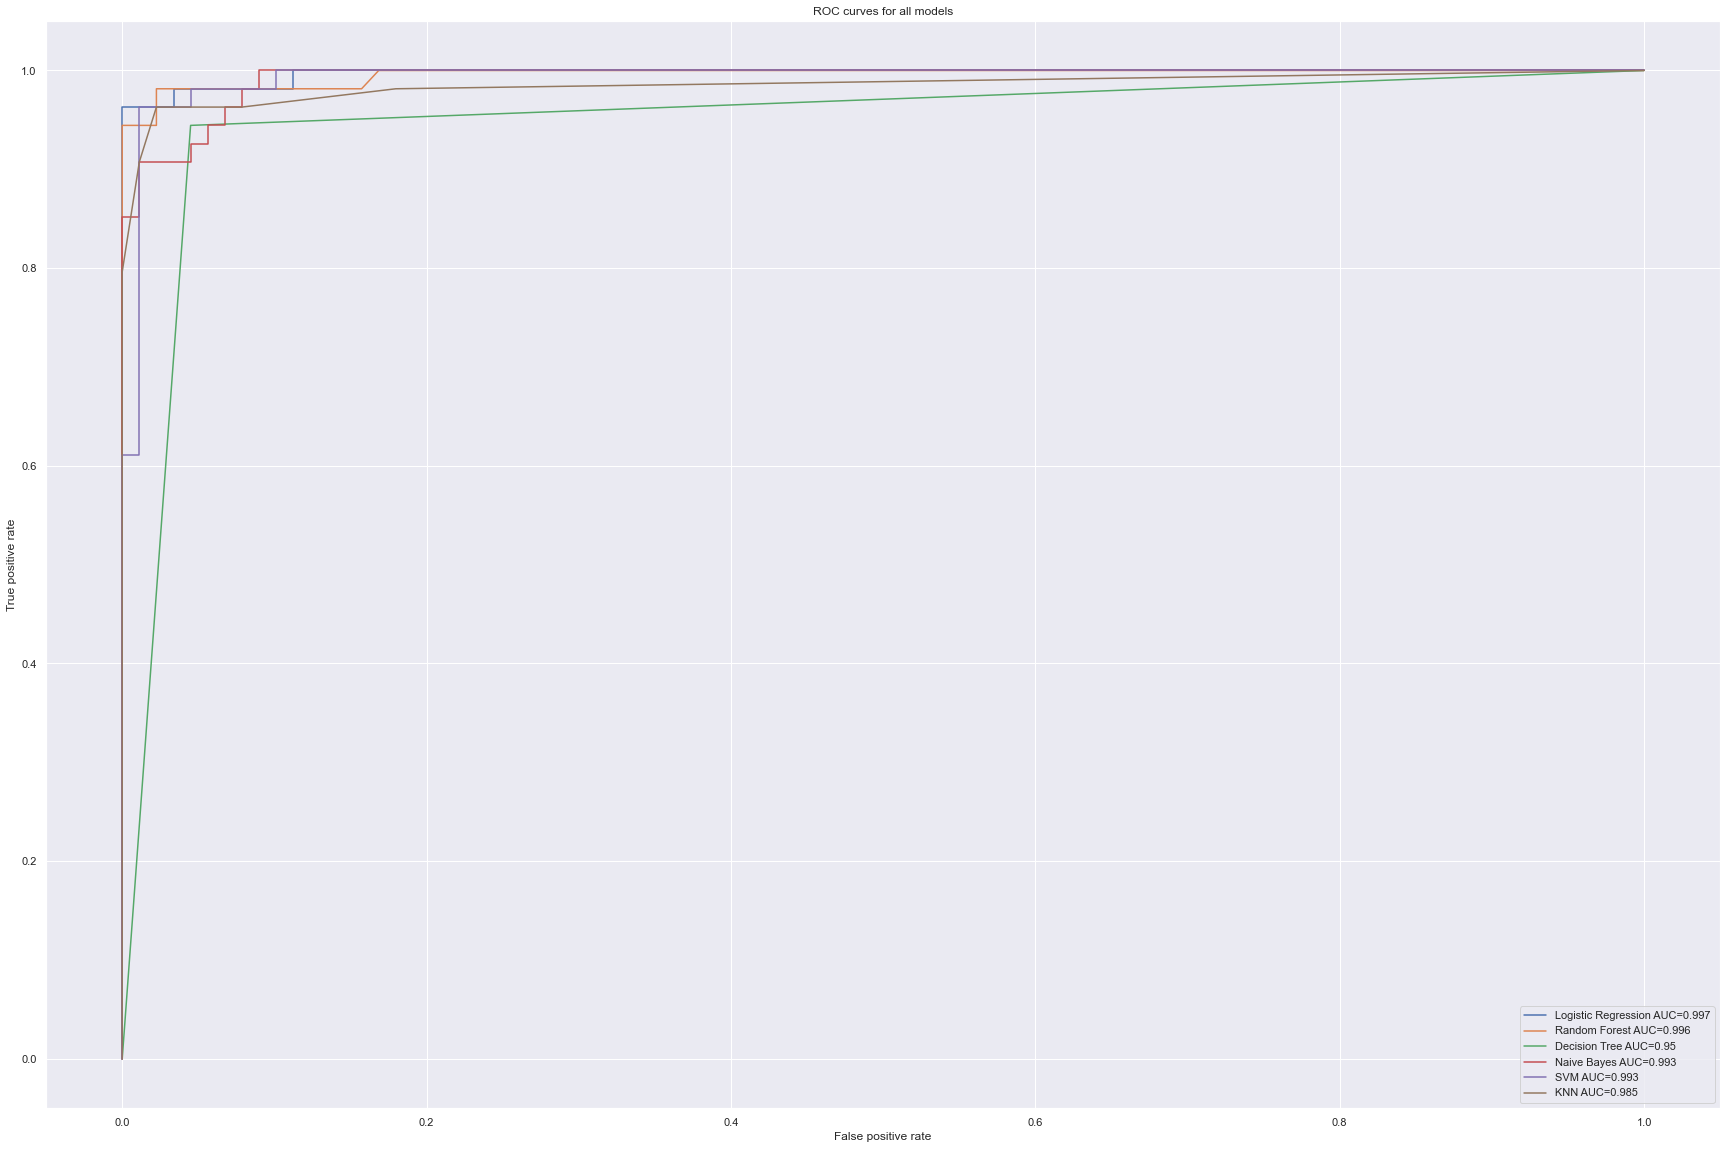

In [58]:
models = {'Logistic Regression' : clf_logreg, 'Random Forest' : clf_rndforest, 'Decision Tree' : clf_dectree,
          'Naive Bayes' : clf_bayes, 'SVM' : clf_svm, 'KNN' : clf_knn}


for model in models:
    y_pred_proba = models[model].predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print(f'AUC for {model}: {auc}')
    plt.plot(fpr, tpr, label=model+" AUC="+str(round(auc, 3)))
    plt.legend(loc='best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for all models')
plt.show()